# **Importing necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
import statsmodels.api as sm
import missingno as msno
from matplotlib.ticker import FuncFormatter

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data sets/Most Streamed Spotify Songs 2024.csv', encoding='latin-1')

In [4]:
df.head()

Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
0    4/26/2024  QM24S2402528             1        725.4     390,470,936   
1     5/4/2024  USUG12400910             2        545.9     323,703,884   
2    3/19/2024  QZJ842400387             3        538.4     601,309,283   
3    1/12/2023  USSM12209777             4        444.9   2,031,280,633   
4    5/31/2024  USUG12403398             5        423.3     107,034,922   

  Spotify Playlist Count Spotify Playlist Reach  Spotify Popularity  \
0                 30,716            196,631,588                92.0   
1                 28,113            174,597,137                92.0   
2                 54,331            211,607,669                92.0   
3                269,802            136,569,078                85.0   
4                  7,223            151,469,874                88.0   

   YouTube Views YouTube Likes TikTok Posts   TikTok Likes    TikTok Views  \
0     84,274,754     1,713,126    5,767,700    651,565,900   5,332,281,936   
1    116,347,040     3,486,739      674,700     35,223,547     208,339,025   
2    122,599,116     2,228,730    3,025,400    275,154,237   3,369,120,610   
3  1,096,100,899    10,629,796    7,189,811  1,078,757,968  14,603,725,994   
4     77,373,957     3,670,188       16,400            NaN             NaN   

  YouTube Playlist Reach  Apple Music Playlist Count AirPlay Spins  \
0            150,597,040                       210.0        40,975   
1            156,380,351                       188.0        40,778   
2            373,784,955                       190.0        74,333   
3          3,351,188,582                       394.0     1,474,799   
4            112,763,851                       182.0        12,185   

  SiriusXM Spins  Deezer Playlist Count Deezer Playlist Reach  \
0            684                   62.0            17,598,718   
1              3                   67.0            10,422,430   
2            536                  136.0            36,321,847   
3          2,182                  264.0            24,684,248   
4              1                   82.0            17,660,624   

   Amazon Playlist Count Pandora Streams Pandora Track Stations  \
0                  114.0      18,004,655                 22,931   
1                  111.0       7,780,028                 28,444   
2                  172.0       5,022,621                  5,639   
3                  210.0     190,260,277                203,384   
4                  105.0       4,493,884                  7,006   

  Soundcloud Streams Shazam Counts  TIDAL Popularity  Explicit Track  
0          4,818,457     2,669,262               NaN               0  
1          6,623,075     1,118,279               NaN               1  
2          7,208,651     5,285,340               NaN               0  
3                NaN    11,822,942               NaN               0  
4            207,179       457,017               NaN               1

# **Data Exploration**

### **Check all the columns**

In [5]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

### **Check Shape of the data**

In [6]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Dataset has 4600 rows and 29 columns


### **Check for missing values**

In [7]:
missing_value_fields = df.isnull().sum().sort_values(ascending=False)
missing_value_fields

TIDAL Popularity              4600
Soundcloud Streams            3333
SiriusXM Spins                2123
Pandora Track Stations        1268
TikTok Posts                  1173
Pandora Streams               1106
Amazon Playlist Count         1055
YouTube Playlist Reach        1009
TikTok Views                   981
TikTok Likes                   980
Deezer Playlist Reach          928
Deezer Playlist Count          921
Spotify Popularity             804
Shazam Counts                  577
Apple Music Playlist Count     561
AirPlay Spins                  498
YouTube Likes                  315
YouTube Views                  308
Spotify Streams                113
Spotify Playlist Reach          72
Spotify Playlist Count          70
Artist                           5
Track                            0
Album Name                       0
Track Score                      0
All Time Rank                    0
ISRC                             0
Release Date                     0
Explicit Track                   0
dtype: int64

### **Insights:**

Focus on analysing the features **Track**, **Artist Name**, **Track Score**, **All Time Rank**, **ISRC**, **Release Date**, **Explicit Track** as they have no missing values, while considering data imputation or removal for columns with high missing values like **TIDAL Popularity** and **Soundcloud Streams**

In [8]:
# reorder the columns in the dataframe based on the number of missing values, from highest to lowest

df_reordered = df[missing_value_fields.index]
df_reordered

TIDAL Popularity Soundcloud Streams SiriusXM Spins  \
0                  NaN          4,818,457            684   
1                  NaN          6,623,075              3   
2                  NaN          7,208,651            536   
3                  NaN                NaN          2,182   
4                  NaN            207,179              1   
...                ...                ...            ...   
4595               NaN         50,633,006            NaN   
4596               NaN                NaN            NaN   
4597               NaN                NaN            NaN   
4598               NaN                NaN            NaN   
4599               NaN                NaN            NaN   

     Pandora Track Stations TikTok Posts Pandora Streams  \
0                    22,931    5,767,700      18,004,655   
1                    28,444      674,700       7,780,028   
2                     5,639    3,025,400       5,022,621   
3                   203,384    7,189,811     190,260,277   
4                     7,006       16,400       4,493,884   
...                     ...          ...             ...   
4595                 13,184       48,370      20,104,066   
4596                    NaN          NaN             NaN   
4597                 28,999        7,596      84,426,740   
4598                    NaN       11,433       6,817,840   
4599                 11,320       78,000      69,006,739   

      Amazon Playlist Count YouTube Playlist Reach    TikTok Views  \
0                     114.0            150,597,040   5,332,281,936   
1                     111.0            156,380,351     208,339,025   
2                     172.0            373,784,955   3,369,120,610   
3                     210.0          3,351,188,582  14,603,725,994   
4                     105.0            112,763,851             NaN   
...                     ...                    ...             ...   
4595                    NaN                 53,016     143,934,379   
4596                    NaN             24,973,048          19,935   
4597                    6.0             29,253,152      36,849,005   
4598                    7.0             25,150,516      37,757,301   
4599                    4.0            175,831,376      70,196,388   

       TikTok Likes Deezer Playlist Reach  Deezer Playlist Count  \
0       651,565,900            17,598,718                   62.0   
1        35,223,547            10,422,430                   67.0   
2       275,154,237            36,321,847                  136.0   
3     1,078,757,968            24,684,248                  264.0   
4               NaN            17,660,624                   82.0   
...             ...                   ...                    ...   
4595     20,202,000                14,217                    2.0   
4596          1,721                   927                    1.0   
4597      5,288,677                    74                    1.0   
4598      2,534,831                   NaN                    NaN   
4599     10,055,461               127,479                    4.0   

      Spotify Popularity Shazam Counts  Apple Music Playlist Count  \
0                   92.0     2,669,262                       210.0   
1                   92.0     1,118,279                       188.0   
2                   92.0     5,285,340                       190.0   
3                   85.0    11,822,942                       394.0   
4                   88.0       457,017                       182.0   
...                  ...           ...                         ...   
4595                71.0       656,337                         3.0   
4596                56.0       193,590                         1.0   
4597                65.0     1,135,998                        19.0   
4598                66.0       448,292                         1.0   
4599                64.0       767,006                        11.0   

     AirPlay Spins YouTube Likes  YouTube Views Spotify Streams  

<Figure size 1200x800 with 0 Axes>

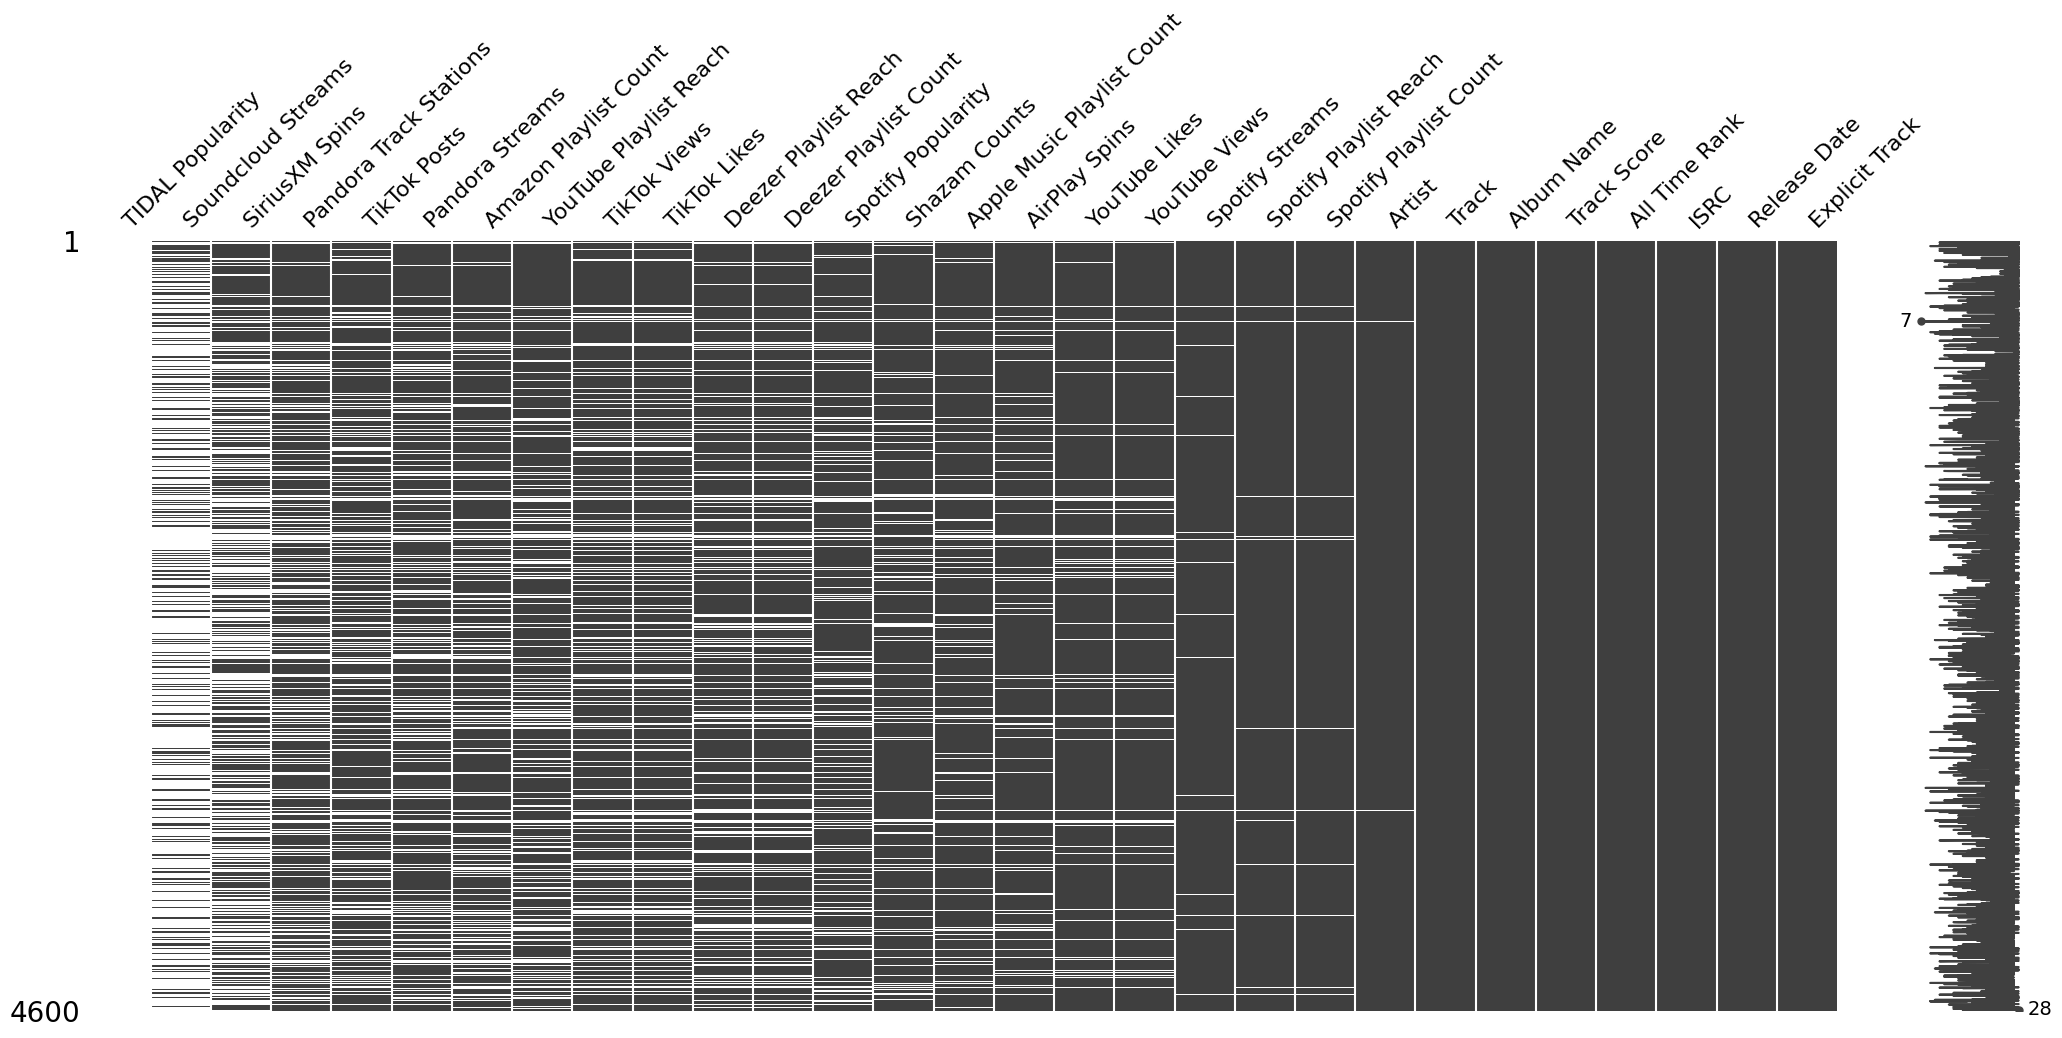

In [9]:
# Creating missingno matrix plot

plt.figure(figsize=(12,8))
ax = msno.matrix(df_reordered)
plt.show()

### **Insights :**

Columns like TIDAL Popularity, Soundcloud Streams, and SiriusXM Spins have a high percentage of missing data, whereas Track, Album Name, Track Score, All Time Rank, ISRC, and Release Date are fully complete and reliable. Prioritize analysis on the complete columns and consider imputing or addressing the substantial gaps in the others.

# **Drop unnecessary fields**

In [10]:
# Drop the columns with high missing values

df.drop(columns=['TIDAL Popularity', 'Soundcloud Streams', 'SiriusXM Spins'], axis=1, inplace = True)
print(f"Shape of dataset after removing coumns with high missing values {df.shape[0]}, {df.shape[1]}")

Shape of dataset after removing coumns with high missing values 4600, 26


In [11]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

### **Insights :**

The dataset is mostly complete for key identifiers like Track, Album Name, ISRC, Track Score.

Some columns still have a moderate number of missing values (e.g.,Spotify streams, Tiktok Posts etc) which may require imputation or specific handling.

The datatypes are appropriate for the nature of the data, with categorical data as object and numerical data as int/float

# **Convert the datatypes**

In [12]:
# function to clean and convert the columns to numeric

def clean_convert_columns(df, columns):
  for col in columns:
    if df[col].dtype == 'object':
      df[col] = df[col].str.replace(',','').astype('float64')
  return df

# List of columns to convert

numerical_cols_to_convert = ['All Time Rank', 'Spotify Streams','Track Score','Spotify Playlist Count','Spotify Playlist Reach',
                             'YouTube Views','YouTube Likes','TikTok Posts','TikTok Likes',
                             'TikTok Views','YouTube Playlist Reach','Apple Music Playlist Count',
                             'AirPlay Spins','Deezer Playlist Reach','Pandora Streams',
                             'Pandora Track Stations','Shazam Counts']

df = clean_convert_columns(df, numerical_cols_to_convert)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   float64
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

In [13]:
# convert the Release Date into datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

In [14]:
# Identify categorical features by selecting column with object data types

cat_columns = [column for column in df.columns if df[column].dtypes == 'O']
cat_columns

['Track', 'Album Name', 'Artist', 'ISRC']

In [15]:
# Identify numerical features by selecting column with non-object data types

num_columns = [column for column in df.columns if df[column].dtypes != 'O']
num_columns

['Release Date',
 'All Time Rank',
 'Track Score',
 'Spotify Streams',
 'Spotify Playlist Count',
 'Spotify Playlist Reach',
 'Spotify Popularity',
 'YouTube Views',
 'YouTube Likes',
 'TikTok Posts',
 'TikTok Likes',
 'TikTok Views',
 'YouTube Playlist Reach',
 'Apple Music Playlist Count',
 'AirPlay Spins',
 'Deezer Playlist Count',
 'Deezer Playlist Reach',
 'Amazon Playlist Count',
 'Pandora Streams',
 'Pandora Track Stations',
 'Shazam Counts',
 'Explicit Track']

In [16]:
# fill missing values in numerical features

for col in num_columns:
  if df[col].dtype in ['float64', 'int64']:
    df[col] = df[col].fillna(df[col].mean())
  else:
    df[col] =df[col].fillna(df[col].mode()[0])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   float64       
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4600 non-null   float64       
 8   Spotify Playlist Count      4600 non-null   float64       
 9   Spotify Playlist Reach      4600 non-null   float64       
 10  Spotify Popularity          4600 non-null   float64       
 11  YouTube Views               4600 non-null   float64     

### **Insights:**

The data is now complete and ready for further analysis, with the majority of columns containing no missing values.

Numeric columns have been converted to float64, facilitating numerical analysis

# **Remove duplicate records**

In [18]:
# calculate & display the number of duplicated rows in the DataFrame
df.duplicated().sum()

2

In [19]:
# Drop duplicate rows, keeping the first occurence
df.drop_duplicates(keep='first', inplace =True)


In [20]:
# check for any duplicates left even after removing duplicates
df.duplicated().sum()

0

# **Check Correlation between Numerical features**

Text(170.72222222222223, 0.5, 'Features')

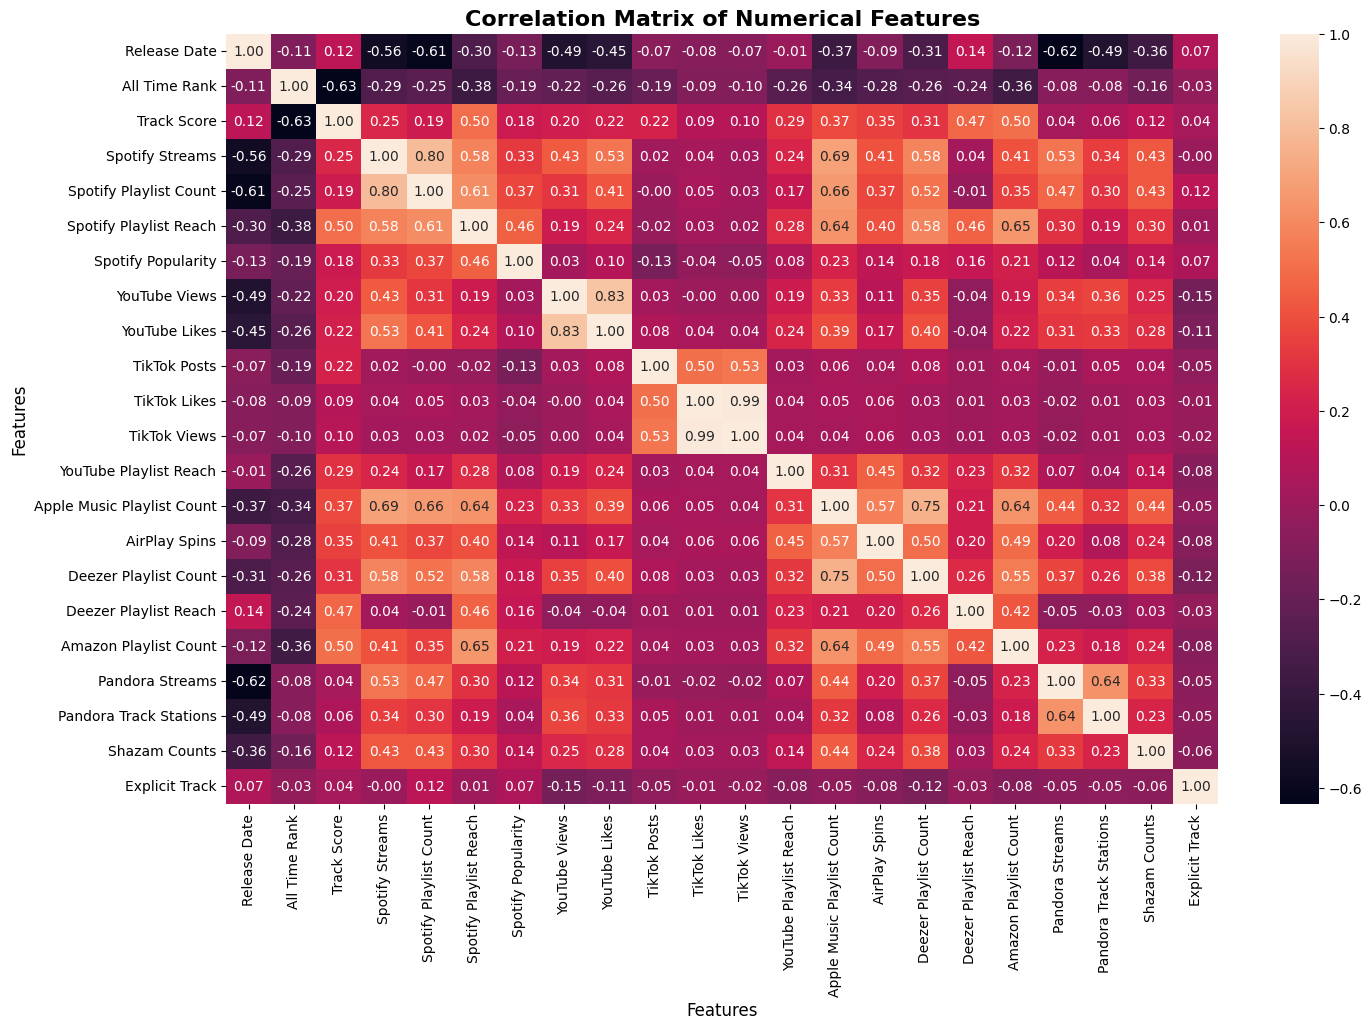

In [21]:
# Calculate the correlation matrix for numerical features
corr_matrix = df[num_columns].corr()

#create a heatmap

plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot = True, fmt ='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight ='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# **Insights**:

Strong Positive Correlation : Tiktok Likes, Tiktok Views exhibit very high positive correlation with each other (close to 1), indicating that these metrics tend to move together

Moderate Positive Correlation : Spotify Streams, Spotify Playlist Count, Youtube Views, Youtube Likes show moderate positive correlations (0.8), suggesting some degree of interdependence.

Negative Correlations: All Time Rank has a strong negative correlation with Track Score (-0.63) implying that as one increase, the other tends to decrease significantly

# **Creating new features**

In [22]:
# Total Streams
df['Total Streams'] = df[['Spotify Streams','YouTube Views','TikTok Views','Pandora Streams']].sum(axis = 1)

# Total Likes
df['Total Likes'] = df[['YouTube Likes','TikTok Likes',]].sum(axis=1)

# Total Playlist count
df['Total Playlist Count'] = df[['Spotify Playlist Count','Apple Music Playlist Count','Deezer Playlist Count','Amazon Playlist Count']].sum(axis=1)

# Total playlist reach
df['Total Playlist Reach'] = df[['Spotify Playlist Reach','YouTube Playlist Reach','Deezer Playlist Reach']].sum(axis=1)

# Release Year
df['Release Year'] = pd.DatetimeIndex(df['Release Date']).year

# Spotify Engagement ratio
df['Spotify Engagement Ratio'] = df['Spotify Streams'] /df['Total Streams']

# Youtube Engagement ratio
df['Youtube Engagement Ratio'] = df['YouTube Views'] /df['Total Streams']


df.head()

Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC  All Time Rank  Track Score  Spotify Streams  \
0   2024-04-26  QM24S2402528            1.0        725.4     3.904709e+08   
1   2024-05-04  USUG12400910            2.0        545.9     3.237039e+08   
2   2024-03-19  QZJ842400387            3.0        538.4     6.013093e+08   
3   2023-01-12  USSM12209777            4.0        444.9     2.031281e+09   
4   2024-05-31  USUG12403398            5.0        423.3     1.070349e+08   

   Spotify Playlist Count  Spotify Playlist Reach  Spotify Popularity  \
0                 30716.0             196631588.0                92.0   
1                 28113.0             174597137.0                92.0   
2                 54331.0             211607669.0                92.0   
3                269802.0             136569078.0                85.0   
4                  7223.0             151469874.0                88.0   

   YouTube Views  YouTube Likes  TikTok Posts  TikTok Likes  TikTok Views  \
0   8.427475e+07      1713126.0     5767700.0  6.515659e+08  5.332282e+09   
1   1.163470e+08      3486739.0      674700.0  3.522355e+07  2.083390e+08   
2   1.225991e+08      2228730.0     3025400.0  2.751542e+08  3.369121e+09   
3   1.096101e+09     10629796.0     7189811.0  1.078758e+09  1.460373e+10   
4   7.737396e+07      3670188.0       16400.0  1.126375e+08  1.161158e+09   

   YouTube Playlist Reach  Apple Music Playlist Count  AirPlay Spins  \
0            1.505970e+08                       210.0        40975.0   
1            1.563804e+08                       188.0        40778.0   
2            3.737850e+08                       190.0        74333.0   
3            3.351189e+09                       394.0      1474799.0   
4            1.127639e+08                       182.0        12185.0   

   Deezer Playlist Count  Deezer Playlist Reach  Amazon Playlist Count  \
0                   62.0             17598718.0                  114.0   
1                   67.0             10422430.0                  111.0   
2                  136.0             36321847.0                  172.0   
3                  264.0             24684248.0                  210.0   
4                   82.0             17660624.0                  105.0   

   Pandora Streams  Pandora Track Stations  Shazam Counts  Explicit Track  \
0       18004655.0                 22931.0      2669262.0               0   
1        7780028.0                 28444.0      1118279.0               1   
2        5022621.0                  5639.0      5285340.0               0   
3      190260277.0                203384.0     11822942.0               0   
4        4493884.0                  7006.0       457017.0               1   

   Total Streams   Total Likes  Total Playlist Count  Total Playlist Reach  \
0   5.825032e+09  6.532790e+08               31102.0          3.648273e+08   
1   6.561700e+08  3.871029e+07               28479.0          3.413999e+08   
2   4.098052e+09  2.773830e+08               54829.0          6.217145e+08   
3   1.792137e+10  1.089388e+09              270670.0          3.512442e+09   
4   1.350061e+09  1.163077e+08                7592.0          2.818943e+08   

   Release Year  Spotify Engagement Ratio  Youtube Engagement Ratio  
0          2024                  0.067033                  0.014468  
1          2024                  0.493323                  0.177312  
2          2024                  0.146731                  0.029916  
3          2023                  0.113344                  0.061162  
4          2024         

# **Univariate Analysis**

### **Differenet Streams Analysis**

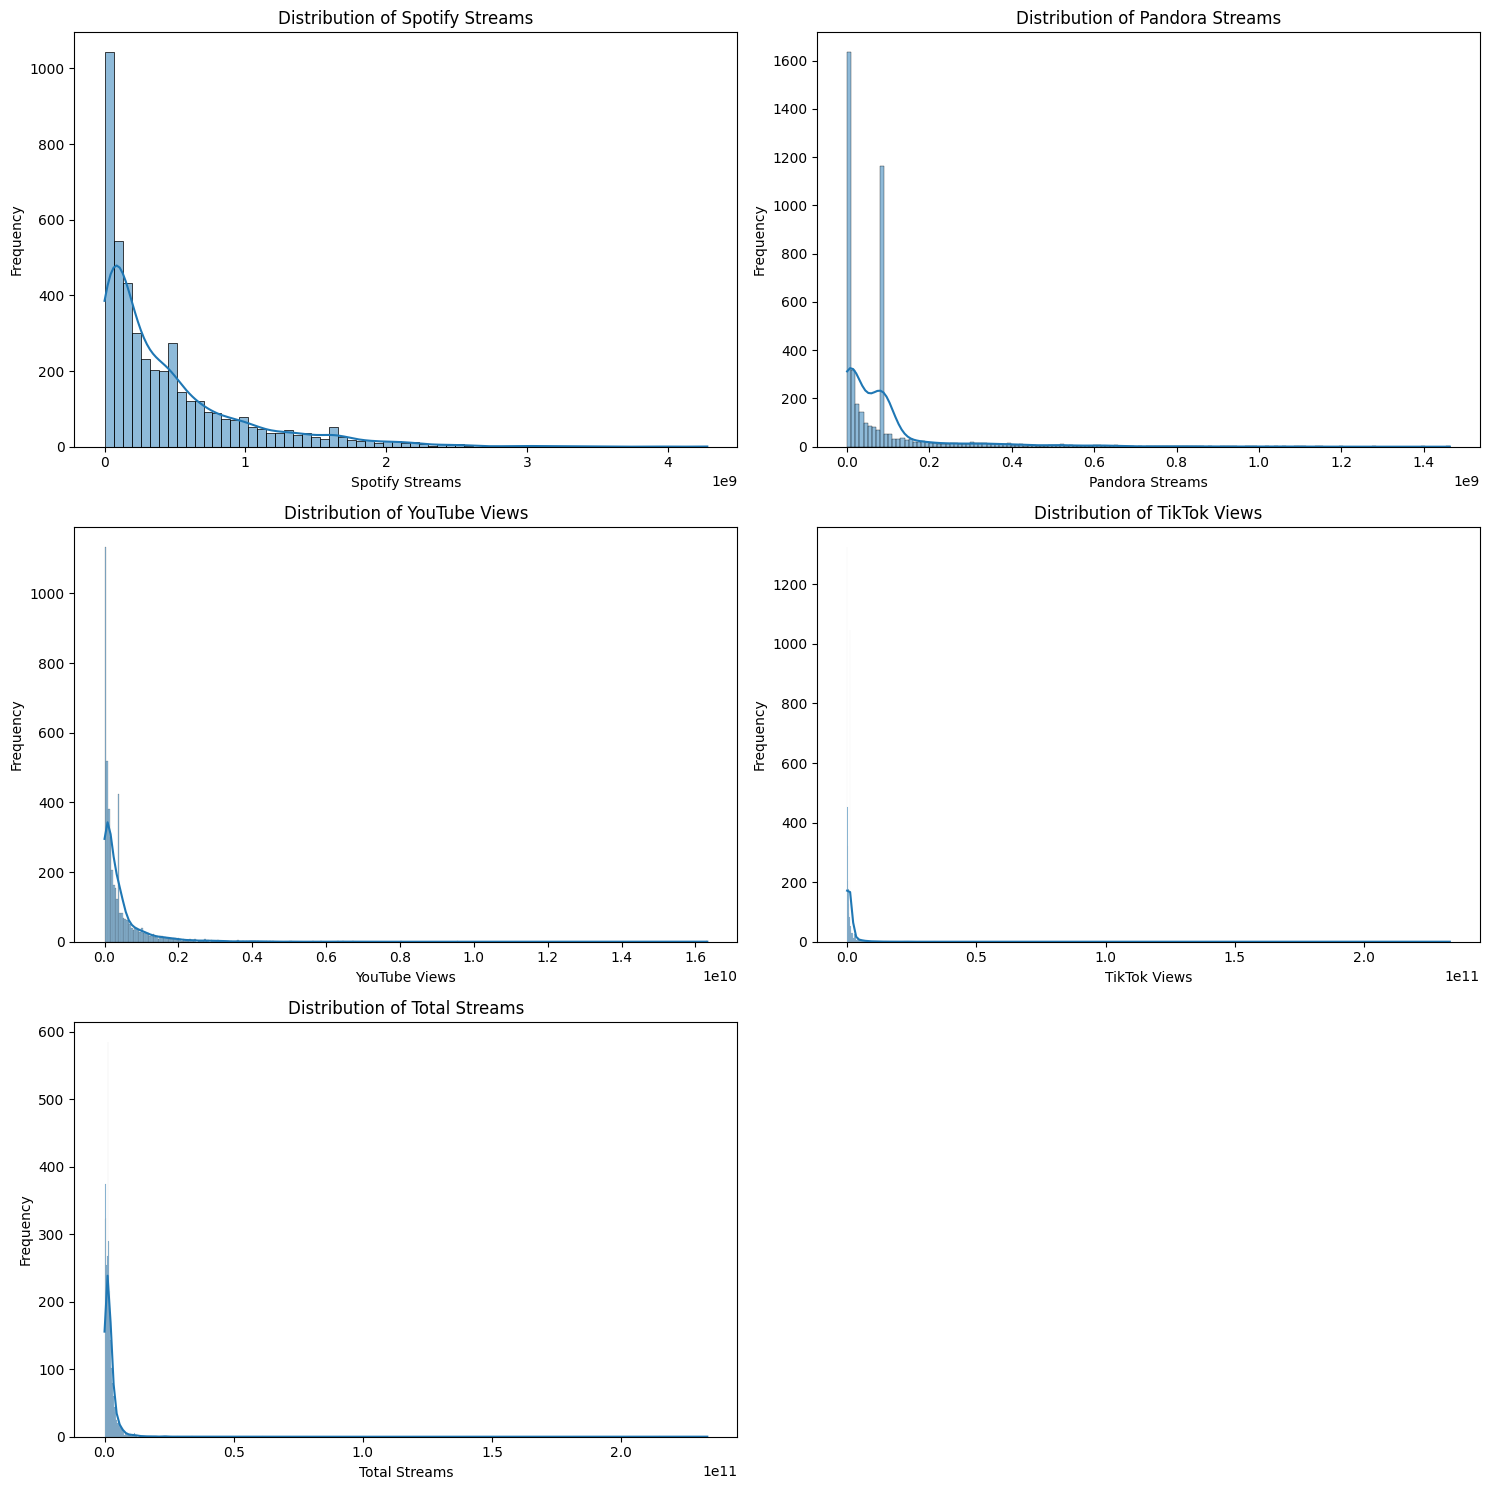

In [23]:
cols = ['Spotify Streams','Pandora Streams','YouTube Views','TikTok Views', 'Total Streams']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))

axes = axes.flatten()

for i, column in enumerate(cols):
  sns.histplot(df[column], kde= True, ax=axes[i])
  axes[i].set_title(f"Distribution of {column}")
  axes[i].set_xlabel(column)
  axes[i].set_ylabel('Frequency')

# remove the unused subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

**Insights:**

Right Skewness:All distributions (Spotify Streams, YouTube Views, Pandora Streams, TikTok Views, and Total Streams) exhibit a right skew, indicating that most tracks have lower stream counts, with a few having exceptionally high counts.

Frequency Peaks at Low Values:The highest frequency of tracks is clustered at the lower stream count values, highlighting that the majority of tracks receive fewer streams.

# **Track Score Analysis**

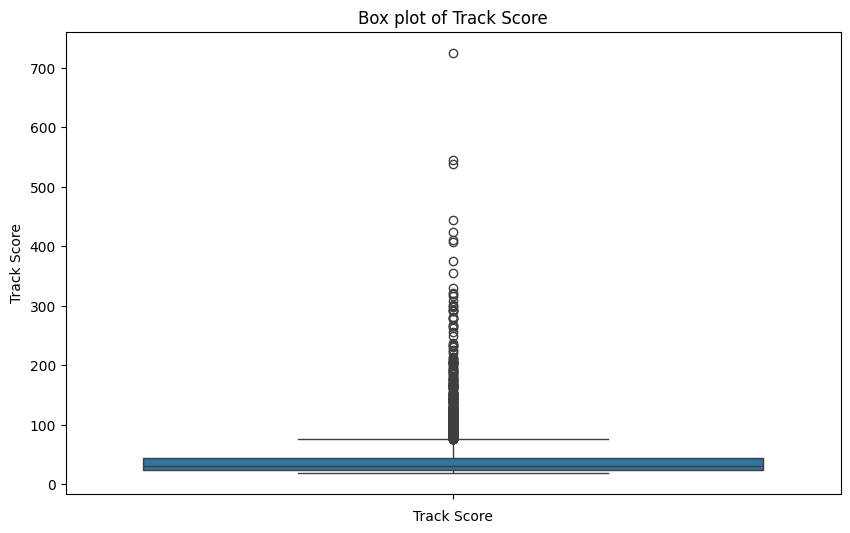

In [24]:
# Create a box plot for Track Score

plt.figure(figsize=(10,6))
sns.boxplot(df['Track Score'])
plt.title("Box plot of Track Score")
plt.xlabel("Track Score")
plt.show()

**Insights:**

Most track scores are clustered in a lower range.

There are many high outliers, indicationg a few tracks with exceptionally high scores.

The distribution is right-skewed, implying higher average scores due to these outliers.

# **Most Frequent Artists Analysis**

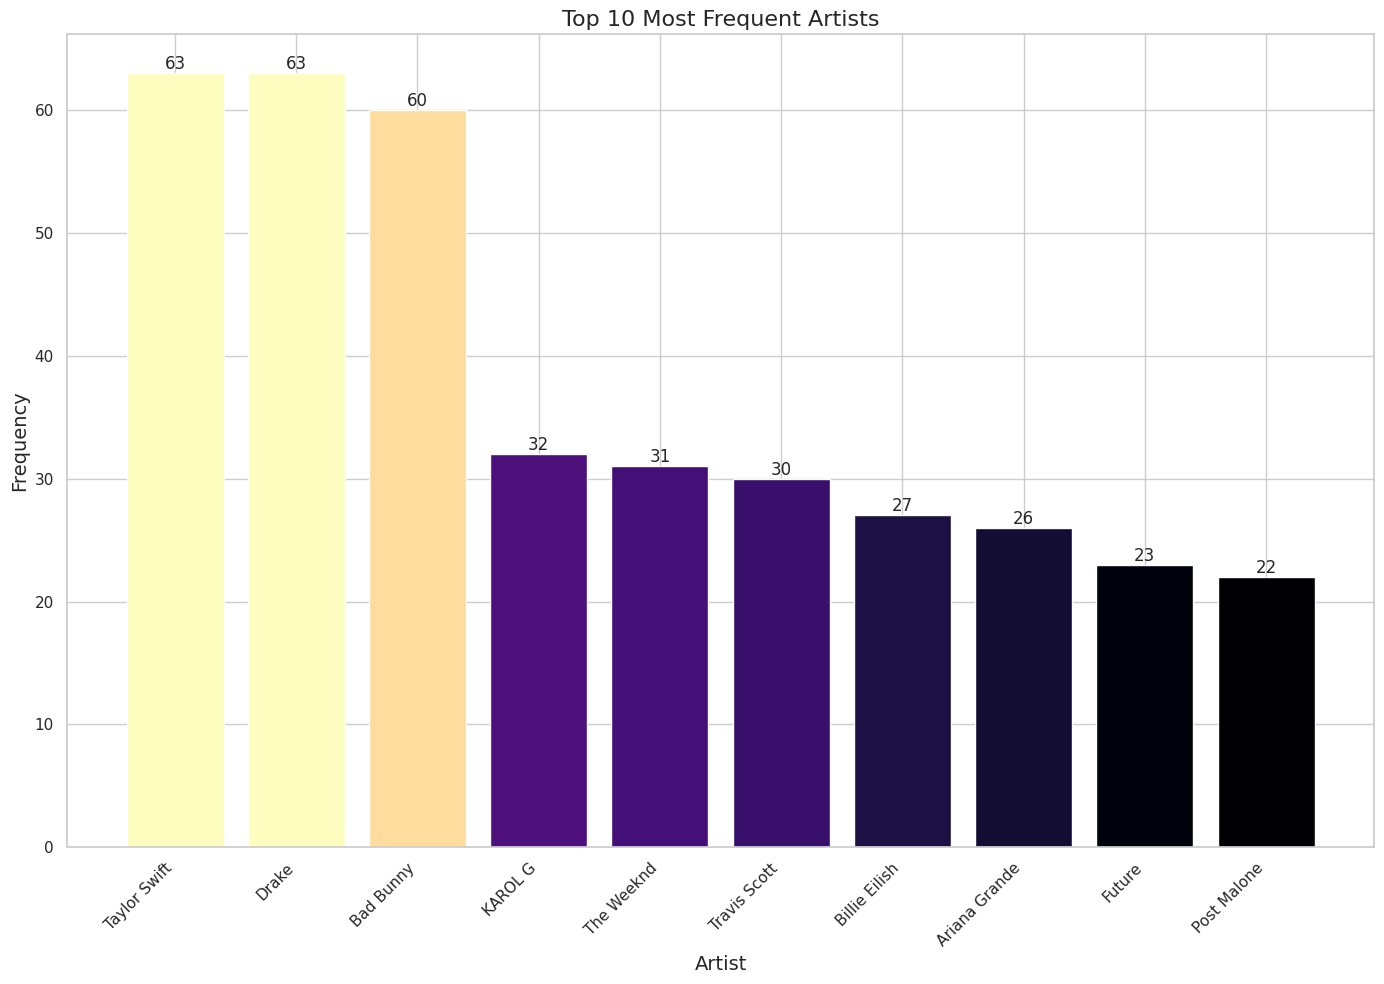

In [25]:
artist_counts = df['Artist'].value_counts()

# Set the style and color palette
sns.set(style='whitegrid')
cmap = plt.get_cmap("magma")

# Normalize data to the range [0, 1] for colormap
norm = plt.Normalize(artist_counts.head(10).values.min(), artist_counts.head(10).values.max())
colors = cmap(norm(artist_counts.head(10).values))

# Bar plot for 'Artist' frequency with colors based on frequency
plt.figure(figsize=(14, 10))
bars = plt.bar(artist_counts.head(10).index, artist_counts.head(10).values, color=colors)

# Add value annotations on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height}', ha='center', va='bottom', fontsize=12)

plt.title('Top 10 Most Frequent Artists', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### **Insights :**

Taylor Swift, drake, Bad Bunny dominate the list with the highest frequencies, indicating their strong presence and popularity.

There is a noticeable gap between the top three artists and the rest, suggesting that these three artists have a particularly high number of tracks or appearances compared to others.

# **Bivariate Analysis**

### **Artist by Track Count Analysis**

<ipython-input-26-f11d98fcd08e>:11: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.barplot(data = top_artists_streams, x='Track', y='Artist', hue='Explicit Track', palette=palette, dodge=True)


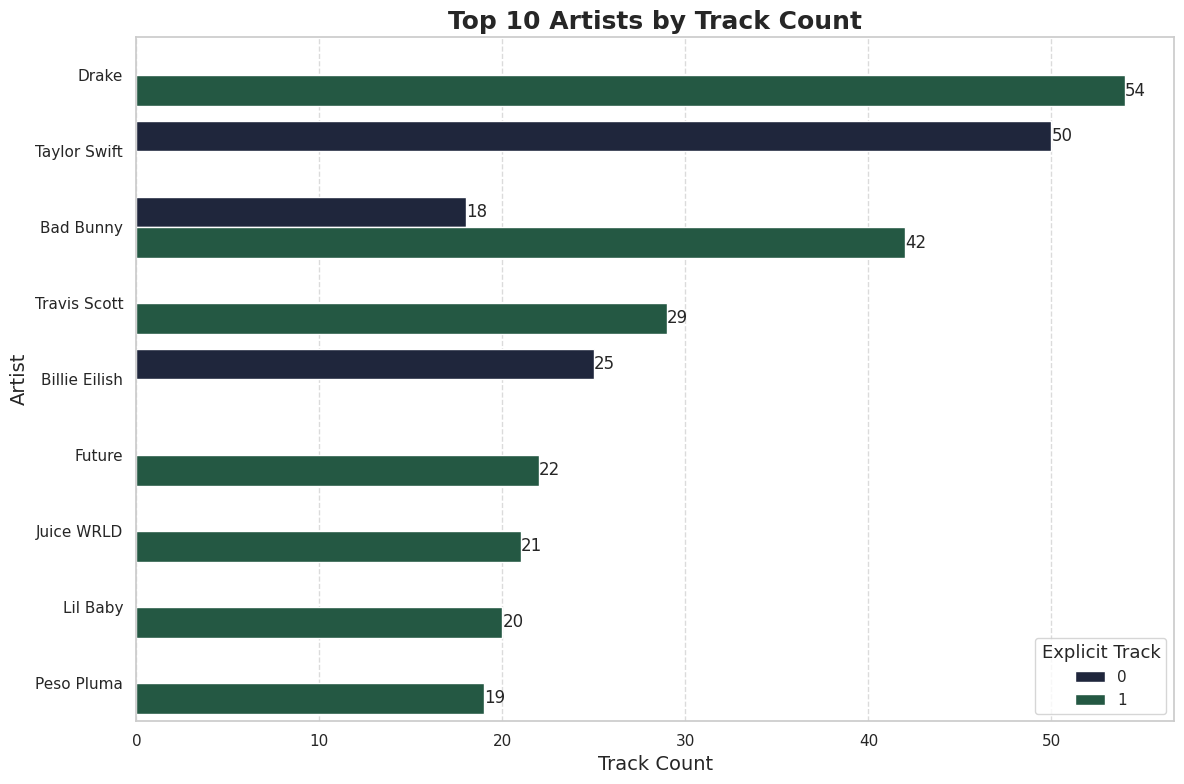

In [26]:
# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("cubehelix")

# Prepare data

top_artists_streams = df.groupby(['Artist', 'Explicit Track'])['Track'].count().nlargest(10).reset_index()

# create bar plot
plt.figure(figsize=(12,8))
ax = sns.barplot(data = top_artists_streams, x='Track', y='Artist', hue='Explicit Track', palette=palette, dodge=True)

# Add annotations
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Customize the plot
plt.title('Top 10 Artists by Track Count', fontsize=18, fontweight='bold')
plt.xlabel('Track Count', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Explicit Track', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()





**Insights :**

**Dominance of Explicit Tracks**: Explicit Tracks are predominant among the top artists, particularly for Drake, Bad Bunny, Travis Scott and Future

**Non-Explicit Content** : Taylor Swift and Billie Ellish are the leading artists with non-explicit content.

**Variety in Track Count**: There is a notable variety in the number of tracks released by these artists, with Drake leading significantly in explicit tracks

# **Artist by Total Stream Analysis**

<ipython-input-27-f1ae32b098d7>:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(data = top_artists_streams, x='Artist', y='Total Streams', hue='Explicit Track',palette=palette, dodge=True)


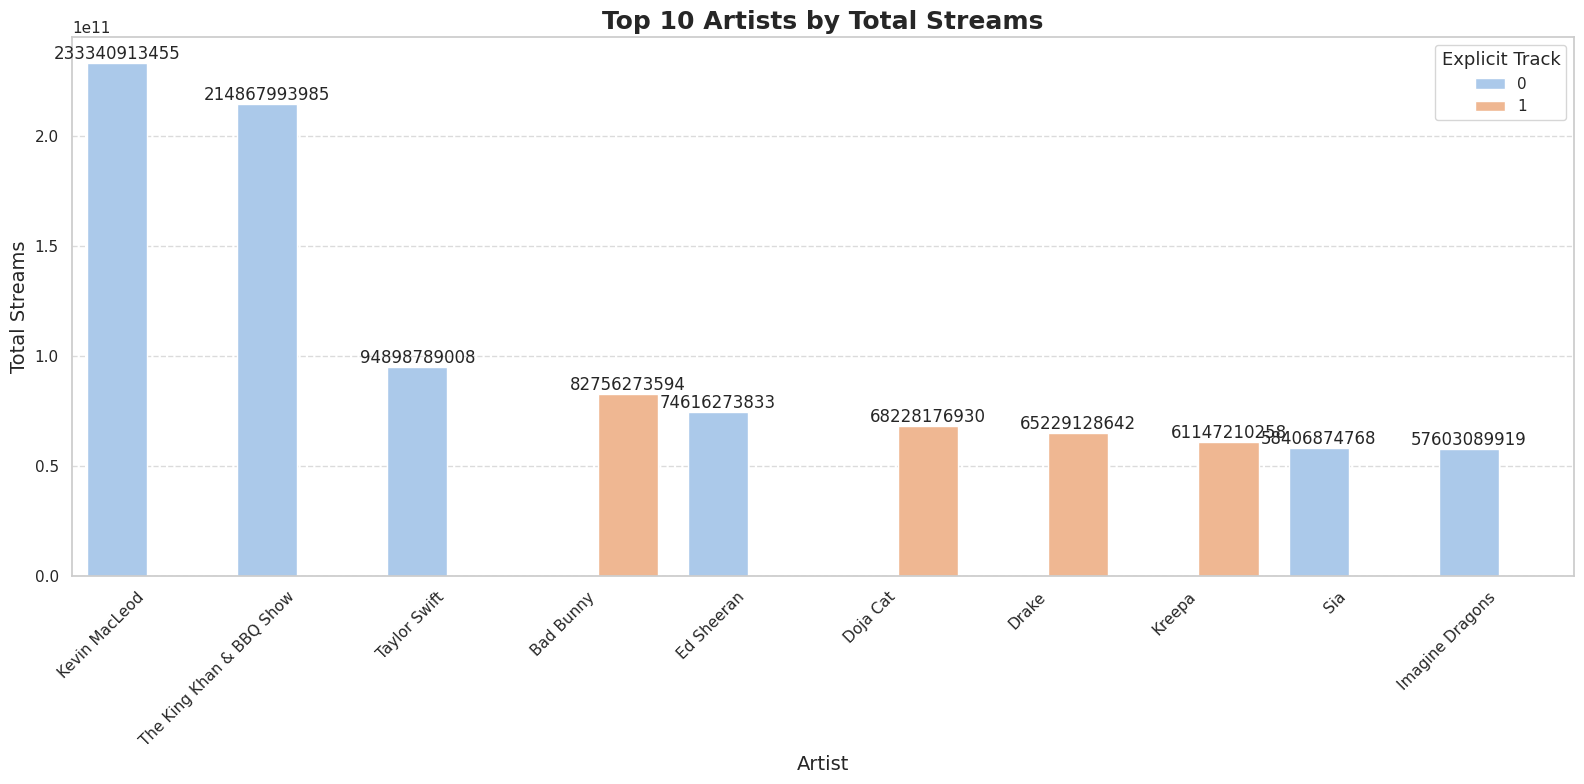

In [27]:
# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")

plt.figure(figsize=(16,8))
top_artists_streams = df.groupby(['Artist', 'Explicit Track'])['Total Streams'].sum().nlargest(10).reset_index()

# create the vertical bar plot
ax = sns.barplot(data = top_artists_streams, x='Artist', y='Total Streams', hue='Explicit Track',palette=palette, dodge=True)

# Add annotations
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Customize the plot
plt.title('Top 10 Artists by Total Streams', fontsize=18, fontweight='bold')
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Total Streams', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Explicit Track', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability

# Show the plot
plt.show()



**Insights :**

The top positions are held by artists with non-explicit content.

Bad Bunny, Doja Cat and Kreepa have significant atreams from explicit tracks indicating their popularity

# **Artists by Total Likes Analysis**

<ipython-input-28-a547f6645ec7>:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(data = top_artists_likes, y='Artist', x='Total Likes', hue='Explicit Track',palette=palette, dodge= True)


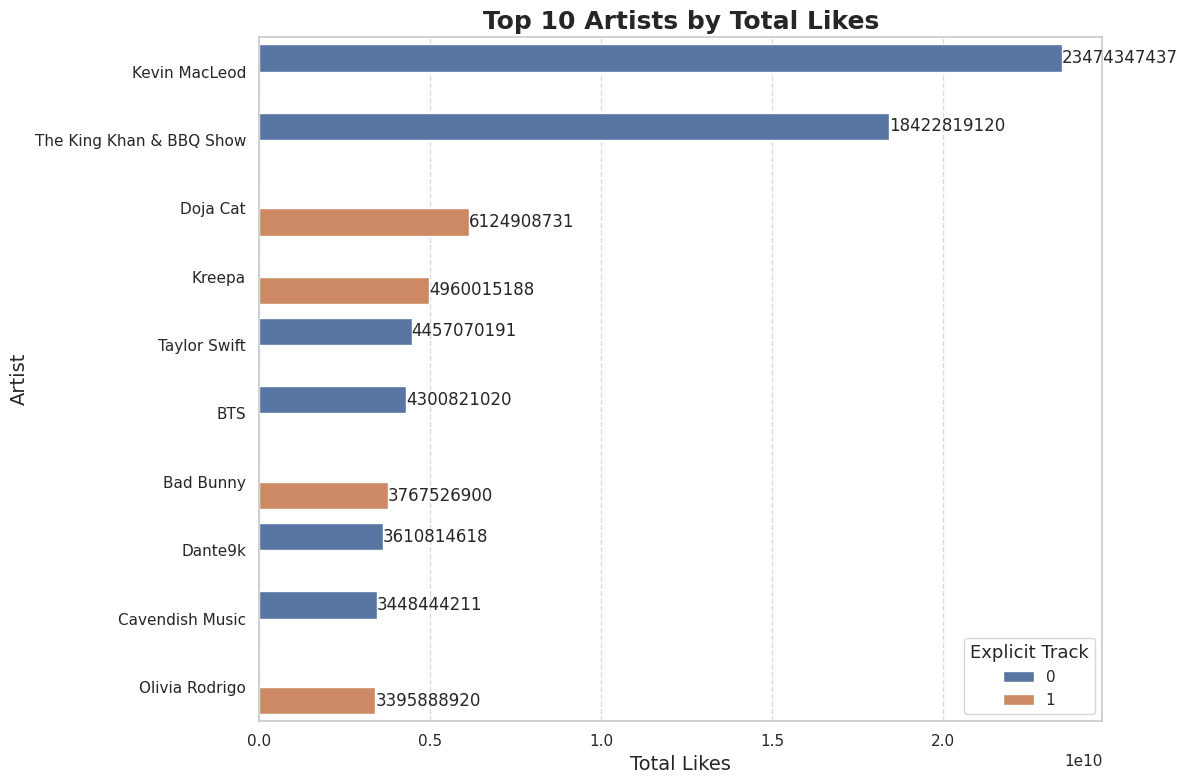

In [28]:
# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("deep")

#prapare data
top_artists_likes = df.groupby(['Artist', 'Explicit Track'])['Total Likes'].sum().nlargest(10).reset_index()

#create a bar plot
plt.figure(figsize=(12,8))
ax = sns.barplot(data = top_artists_likes, y='Artist', x='Total Likes', hue='Explicit Track',palette=palette, dodge= True)


# Add annotations
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Customize the plot
plt.title('Top 10 Artists by Total Likes', fontsize=18, fontweight='bold')
plt.xlabel('Total Likes', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Explicit Track', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability

# Show the plot
plt.show()

**Insights:**

The top positions are held by artists with non-explicit content, with Kevin MacLeod, The King Khan & BBQ Show show leading

Doja Cat, Kreepa, Bad Bunny, Olivia Rodrigo show strong performance in explicit tracks

# **Artist by Total Playlist Count Analysis**

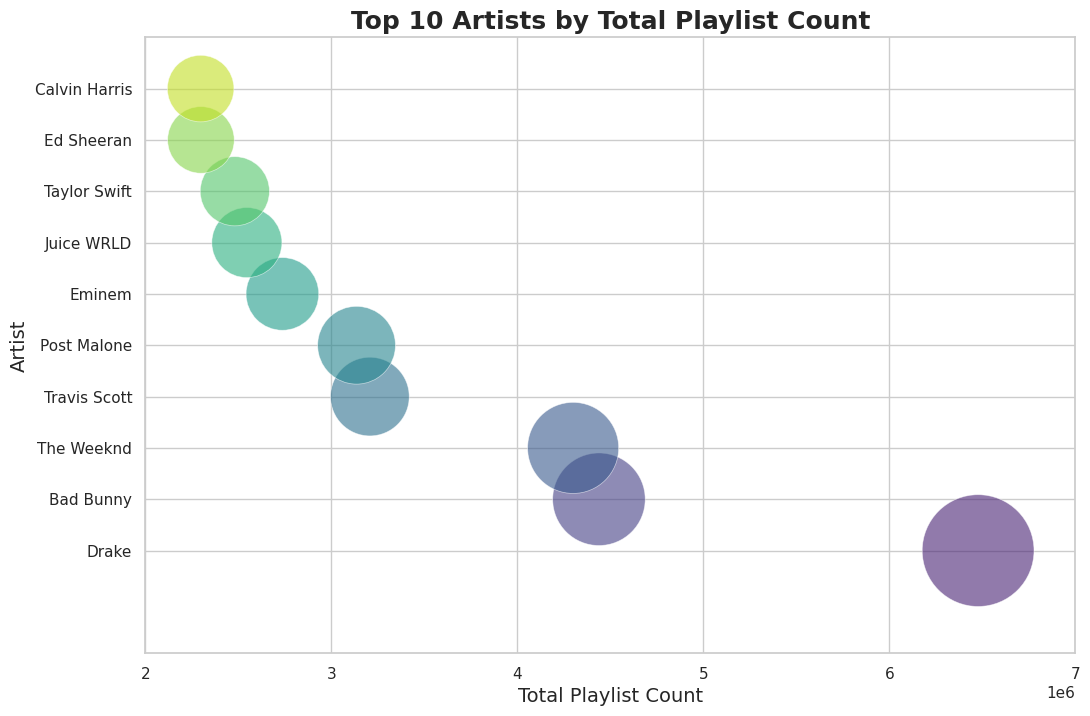

In [29]:
# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("Spectral")

top_artists_playlist_count = df.groupby(['Artist'])['Total Playlist Count'].sum().nlargest(10).reset_index()

# Create a bubble chart
plt.figure(figsize=(12, 8))
plt.scatter(x=top_artists_playlist_count['Total Playlist Count'], y=top_artists_playlist_count['Artist'], s=top_artists_playlist_count['Total Playlist Count']/1000, color=sns.color_palette("viridis", 10), alpha=0.6, edgecolors="w", linewidth=0.5)
plt.title('Top 10 Artists by Total Playlist Count', fontsize=18, fontweight='bold')
plt.xlabel('Total Playlist Count', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.xlim(2e6,7e6)
plt.ylim(-2,10)
plt.show()

Domiance of Drake : Drake has the highest total playlist count, indicating a strong presence in playlists

Significance Counts for popular Artists : Bad Bunny, The Weeknd and Travis Scott also have high playlist counts showcasing their popularity

Varied Representation: The plot highlights a diverse range of artists with different levels of playlist counts.

This plot effectively visualizes the total playlist count for the top 10 artists, using bubble size and position to represent the data clearly


# **Trend of different streams over year till 2023**

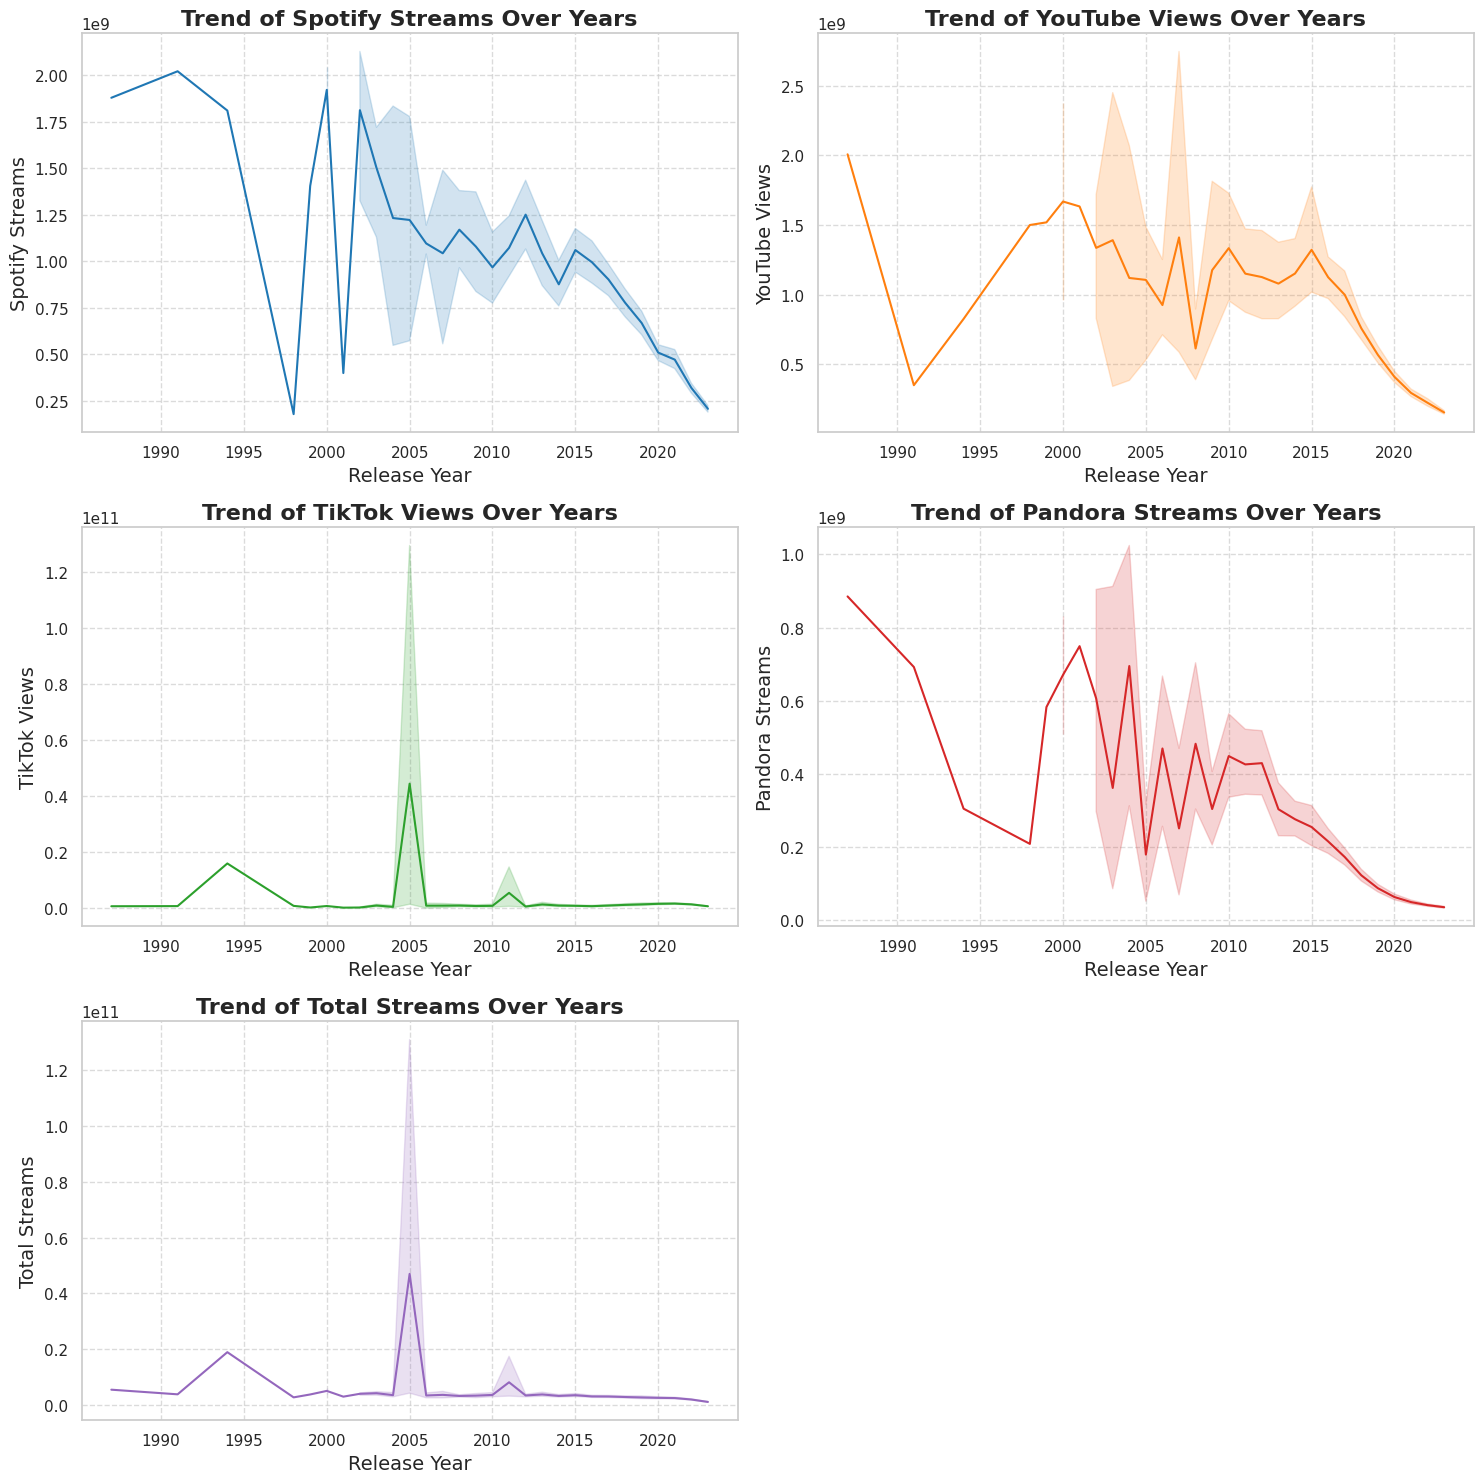

In [30]:
cols_to_plot = ['Spotify Streams','YouTube Views','TikTok Views','Pandora Streams','Total Streams']


# Filter data to include only upto 2023

df = df[df['Release Year'] <= 2023]

# Set up the figure and axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Set the color palette
palette = sns.color_palette("tab10", len(cols_to_plot))

# Plot each column
for i, column in enumerate(cols_to_plot):
    sns.lineplot(data=df, x='Release Year', y=column, ax=axes[i], color=palette[i])
    axes[i].set_title(f'Trend of {column} Over Years', fontsize=16, fontweight='bold')
    axes[i].set_xlabel('Release Year', fontsize=14)
    axes[i].set_ylabel(column, fontsize=14)
    axes[i].grid(True, linestyle='--', alpha=0.7)  # Add gridlines for readability

# Remove the unused subplot
fig.delaxes(axes[-1])

# Adjust the layout
plt.tight_layout()
plt.show()


**Insights:**

Spotify Streams Over Years : The trend shows significant fluctuations with an initial increase peaking around 1990, followed by a decline and stabilization around 2000, There is a noticeable drop post 2010

Youtube Views Over Years : There is a rise and fall pattern, with a peak around 2005, followed by fluctuations a decline post - 2010

Tiktok Views Over Years : Tiktok views trend shows a major spike around 2005, followed by a sharp drop and maintaining low levels thereafter

Pandoram Streams Over Years : Pandorama streams have a decreasing trend overall, with some fluctuations and a slight increase around 2005, but continuous decline post 2005

Total Streams Over Years : The combined trend for total streams also shows a significant spike around 2005, followed by a sharp decline and low levels in the subsequent years.

These trends indicate that while there were significant peaks in activity around certain periods, particularly 2005, many of the platforms experienced declines in the following years, suggesting shifts in user engagement and platform popularity over time.

# **Yearly Growth Stream wise till 2023**

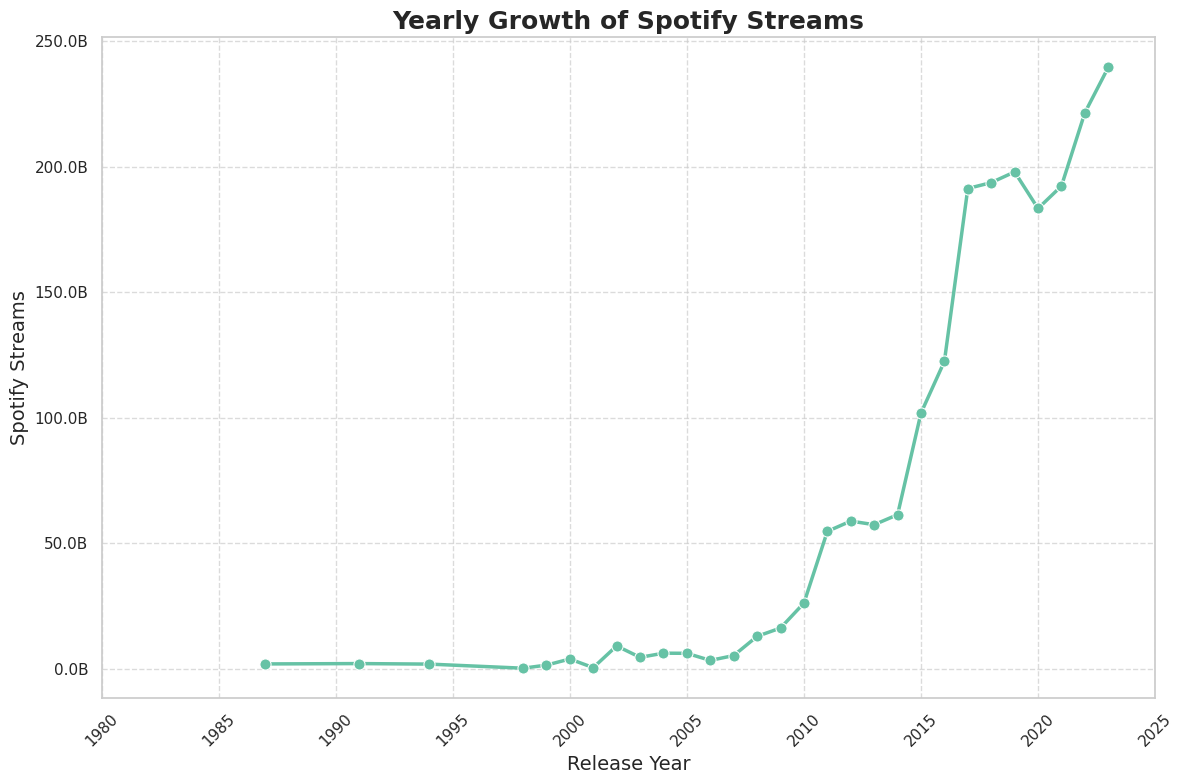

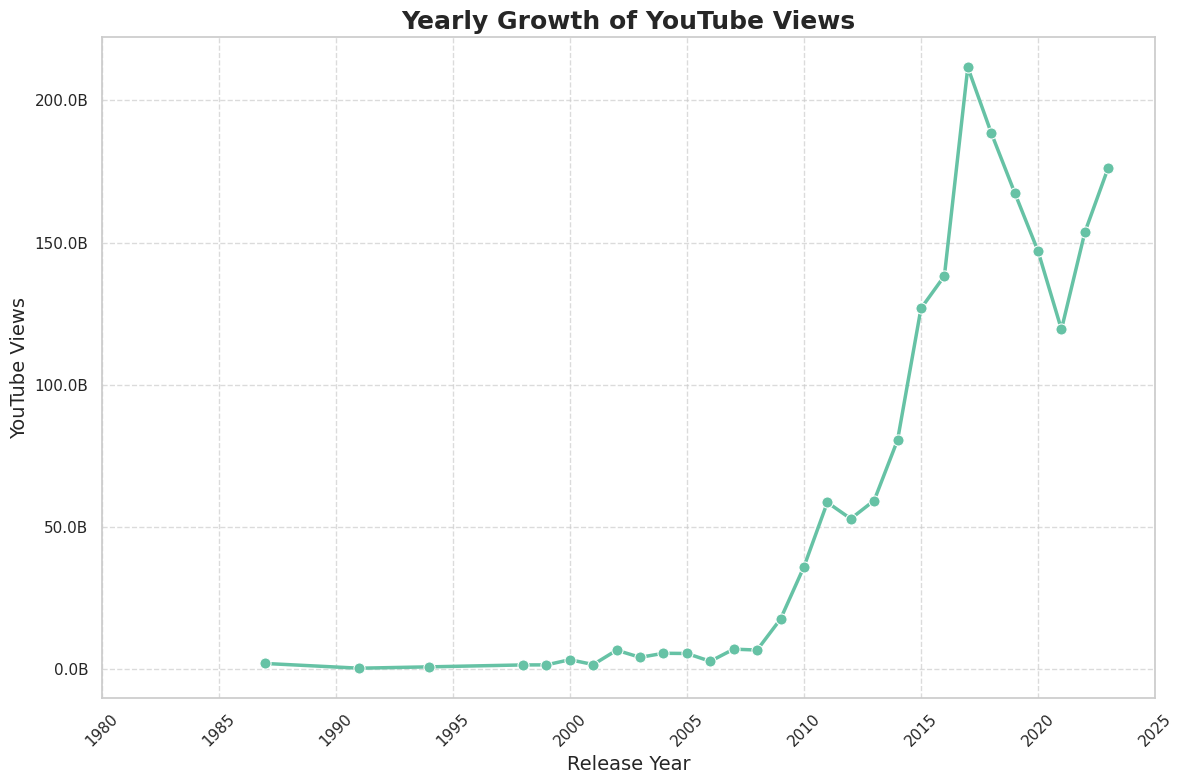

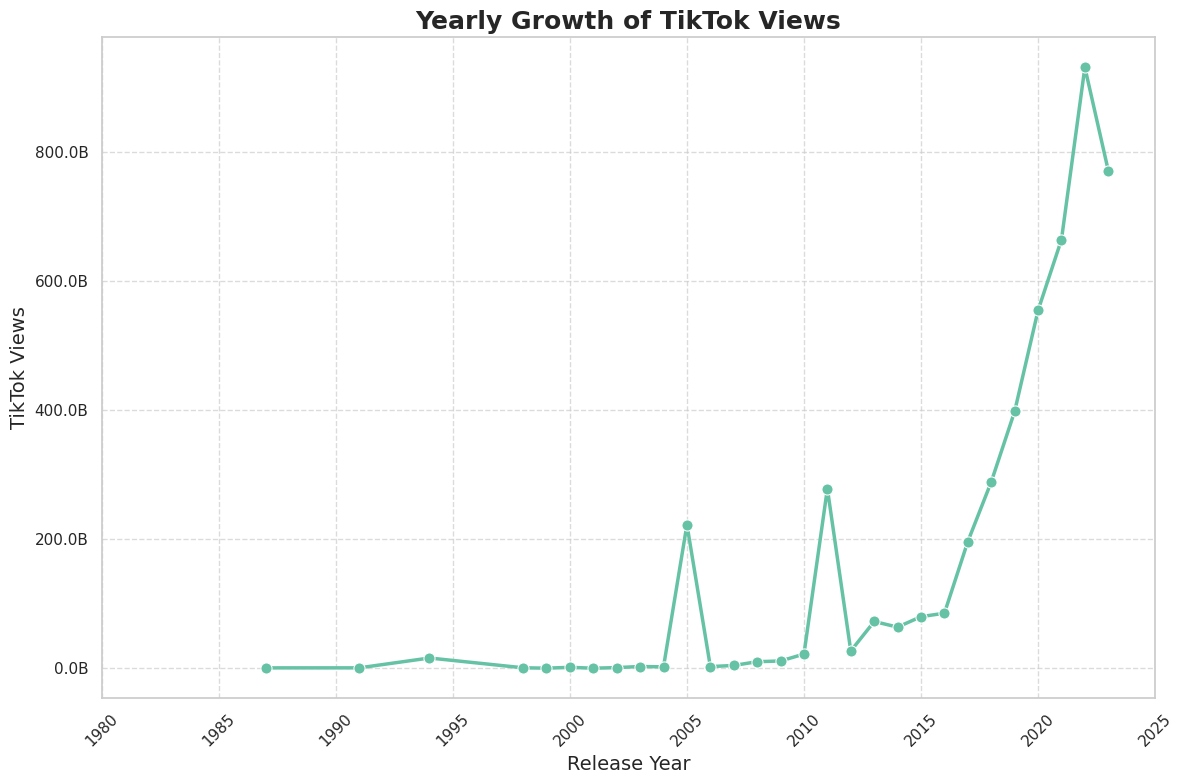

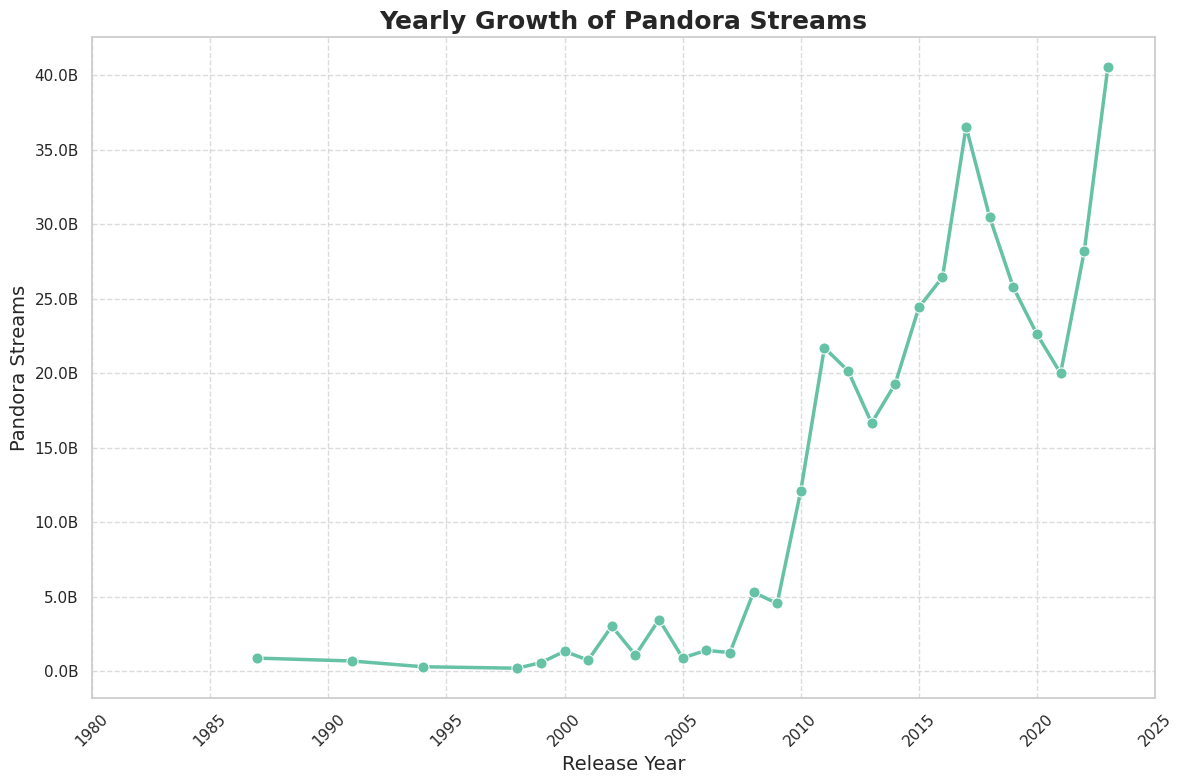

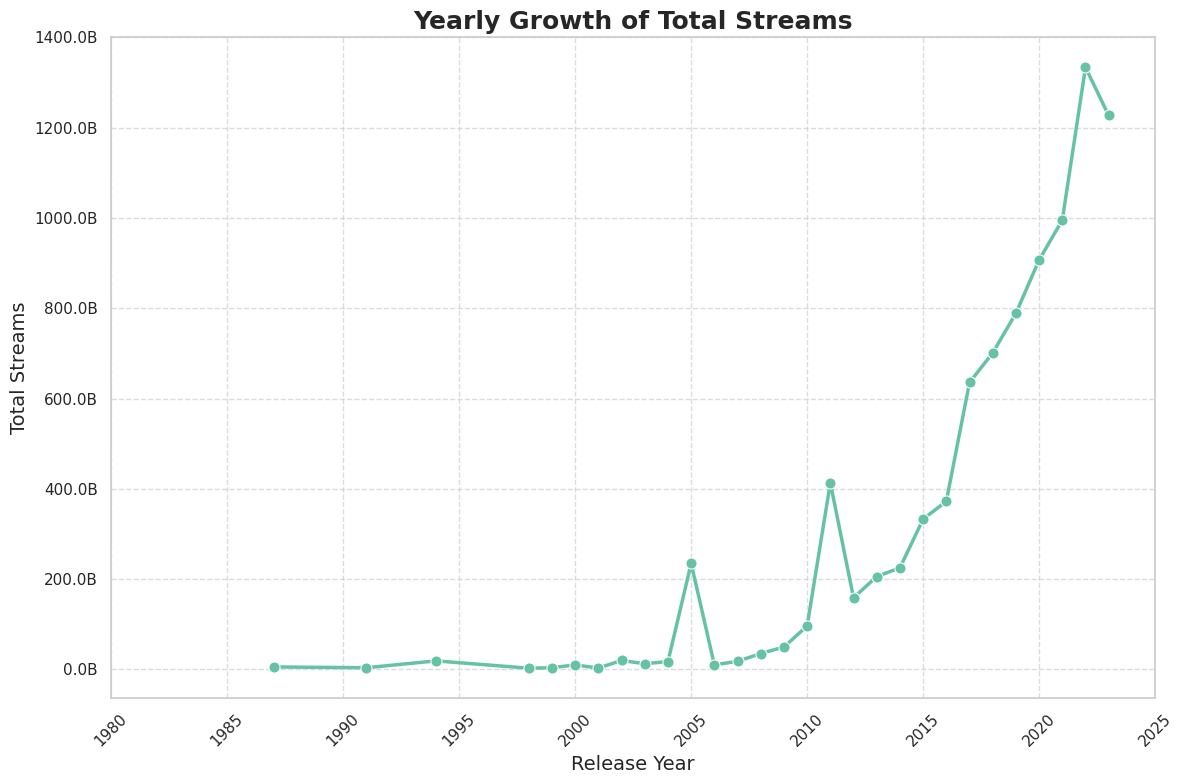

In [31]:
cols_to_plot = ['Spotify Streams','YouTube Views','TikTok Views','Pandora Streams','Total Streams']

# define a color palette
palette = sns.color_palette("Set2")

# function to plot the yearly growth of a given stream type
def plot_yearly_growth(column_name, title):
  streams_per_year = df[df['Release Year'] <= 2023].groupby('Release Year')[column_name].sum().reset_index()

  plt.figure(figsize=(12,8))
  sns.lineplot(x='Release Year', y=column_name, data=streams_per_year, marker='o', color=palette[0], linewidth=2.5, markersize=8)

  plt.title(title, fontsize=18, fontweight='bold')
  plt.xlabel("Release Year", fontsize=14)
  plt.ylabel(column_name, fontsize=14)

  # Format the y-axis to display numbers in billions
  formatter = FuncFormatter(lambda x, pos: '%1.1fB' % (x * 1e-9))
  plt.gca().yaxis.set_major_formatter(formatter)

  # Add gridlines for readability
  plt.grid(True, linestyle='--', alpha=0.7)

  plt.xlim(1980, 2025)

  # Improve x-ticks rotation and layout
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# plotting the yearly growth for different stream types

for column in cols_to_plot:
  plot_yearly_growth(column, f'Yearly Growth of {column}')


**Insights :**

Spotigy Streams : The number of Spotify streams has shown exponential growth since around 2015, with a steep increase in recent years.

Youtube Views : YouTube views have also grown significantly, with notable peaks around 2015 and 2020, followed by a slight decrease and then a rise again.

Tiktok Views :  TikTok views have exploded in recent years, particularly from around 2016 onwards, with a massive spike around 2022

Pandora Streams : Pandora streams show a more gradual increase compared to Spotify and YouTube, with fluctuations but a general upward trend especially post-2010.

Total Streams : The total number of streams from all platforms shows a dramatic rise, reflecting the combined growth treds of individual platforms, with the most significant increase occuring post - 2010

These trends highlight the growing consumption of digital media over the years, with newer platforms like TikTok showing particularly rapid growth


# **Yearly growth Playlist Count wise till 2023**

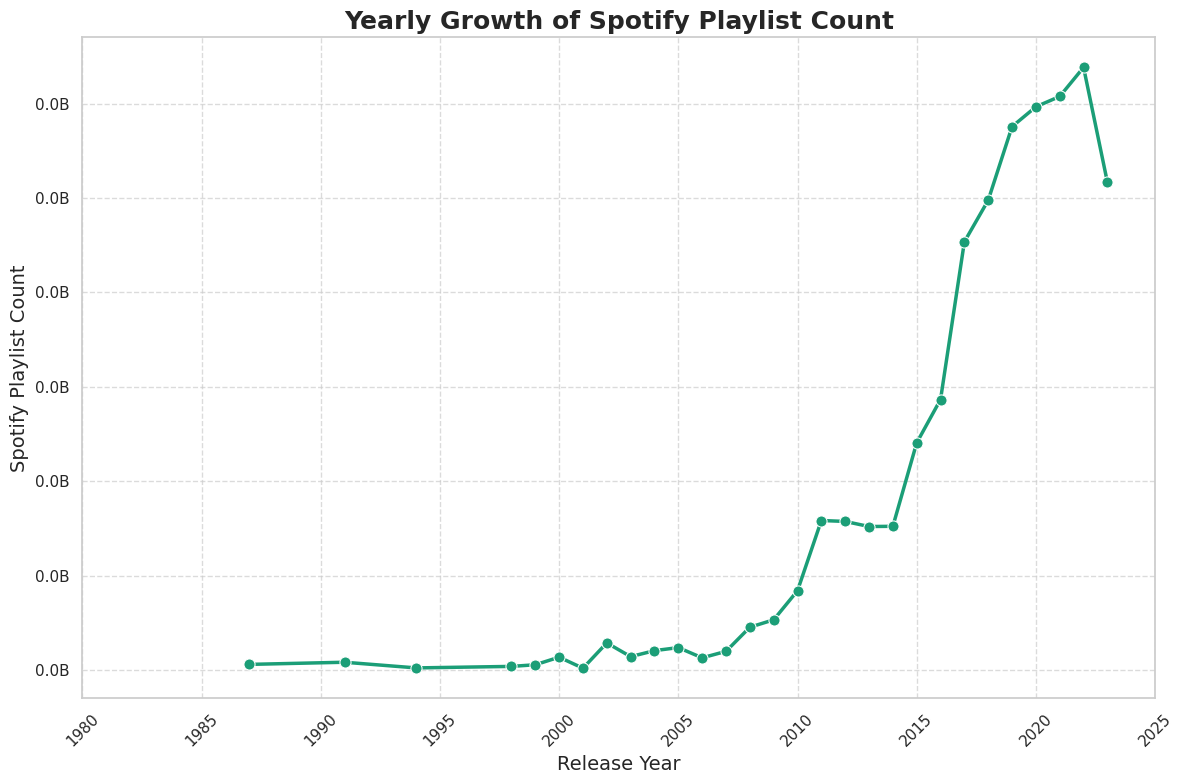

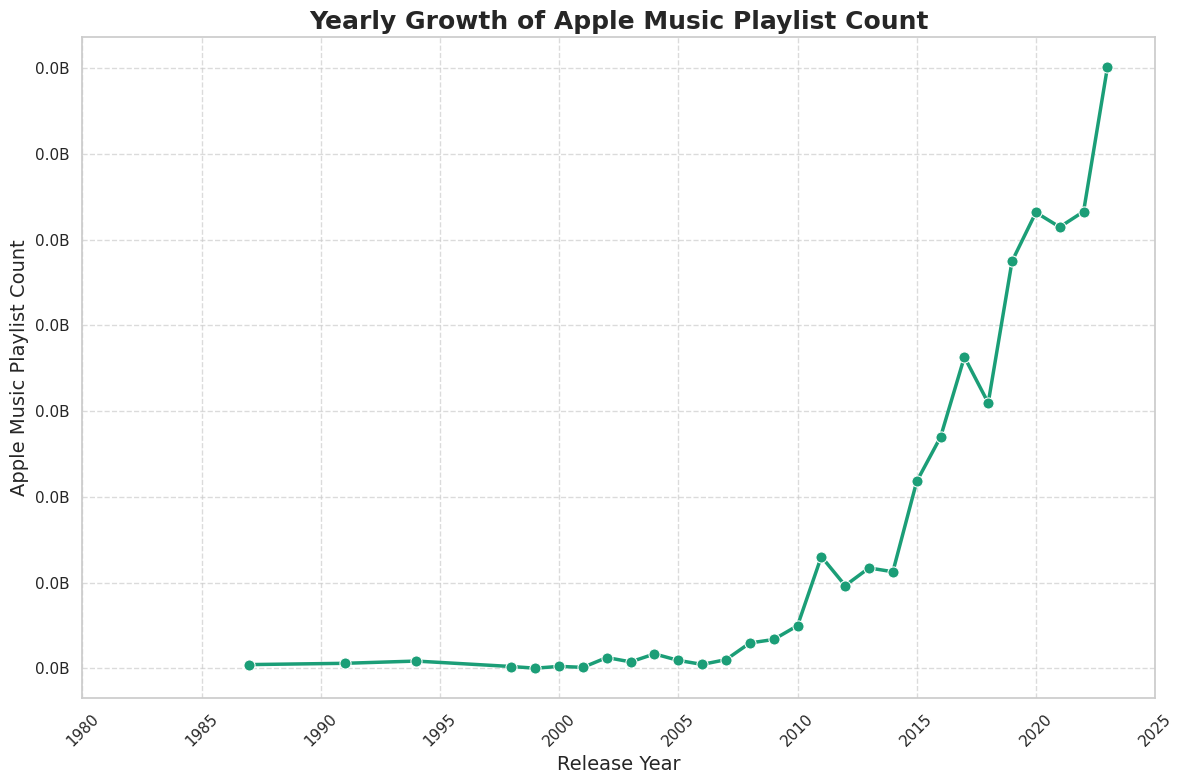

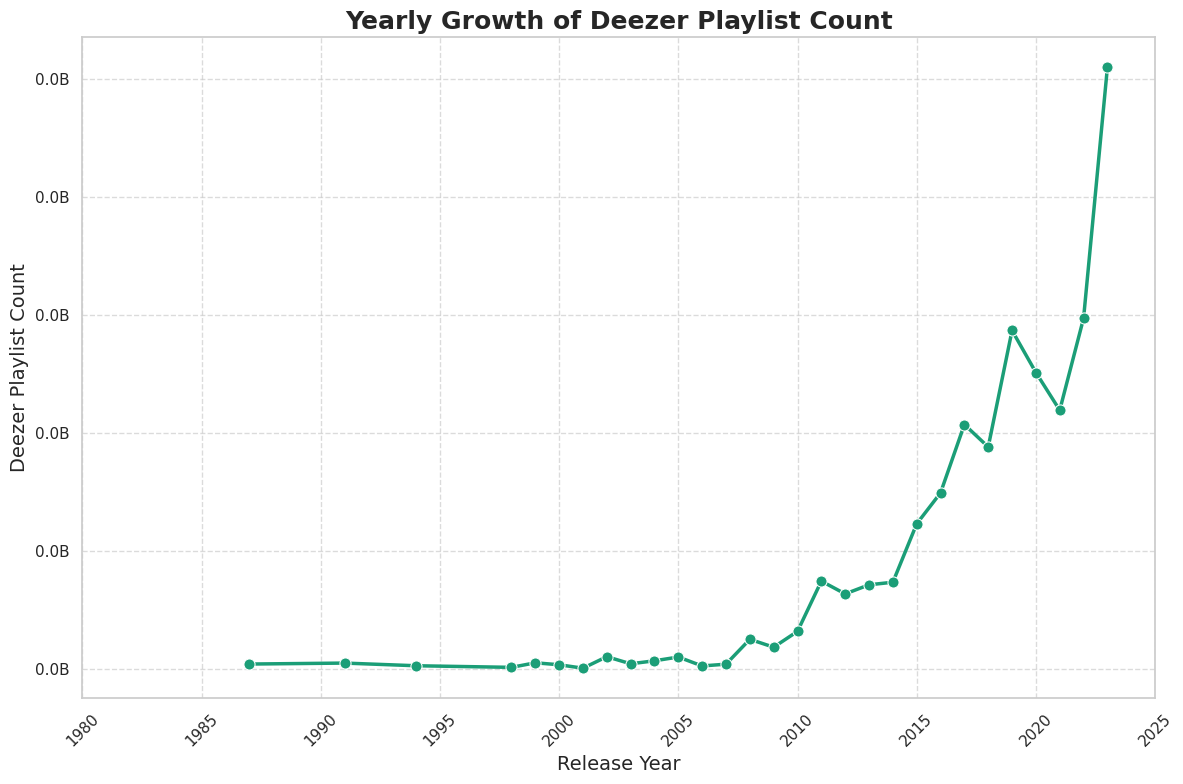

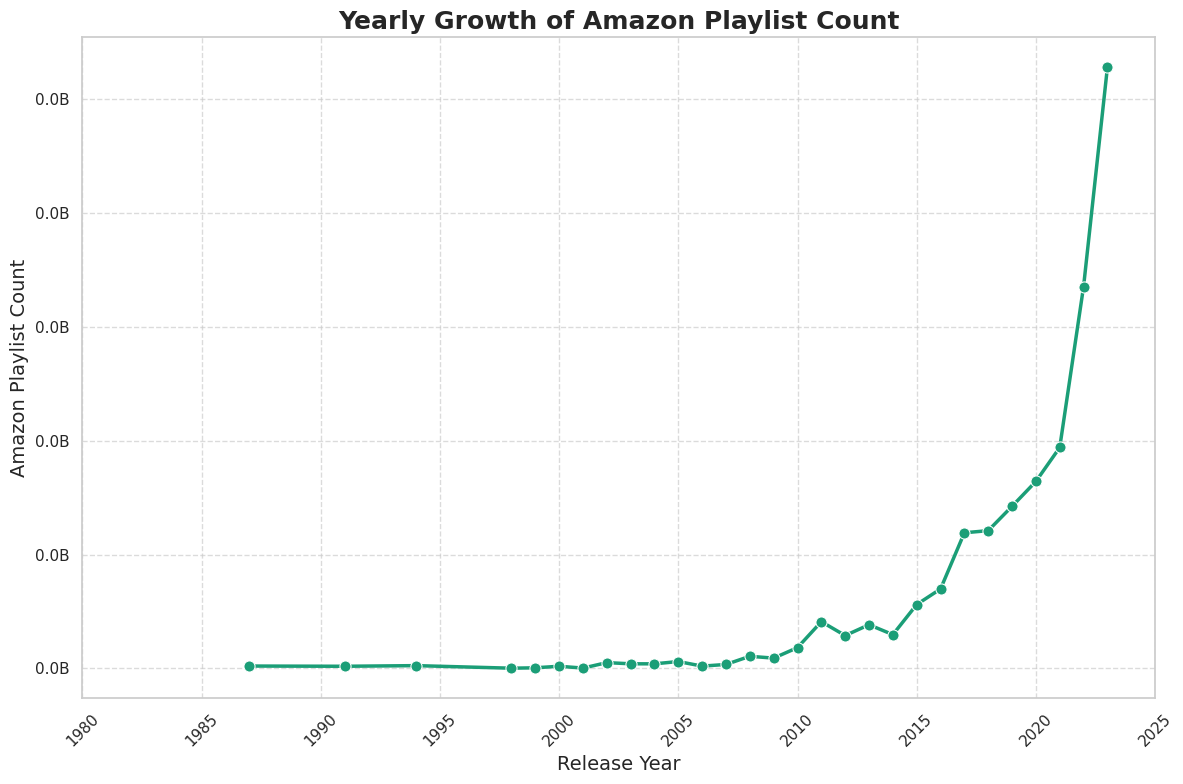

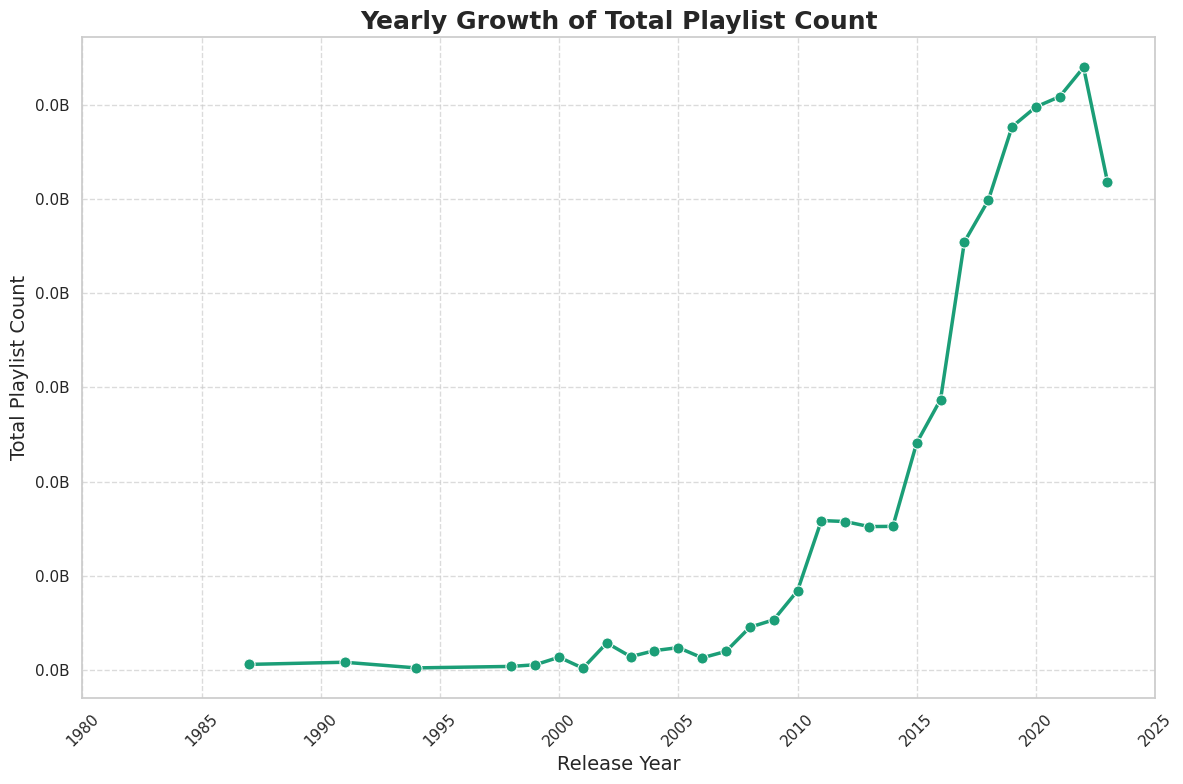

In [32]:
count_columns = ['Spotify Playlist Count','Apple Music Playlist Count','Deezer Playlist Count','Amazon Playlist Count','Total Playlist Count']

palette = sns.color_palette("Dark2", n_colors=4)

def plot_yearly_growth(column_name, title):
  counts_per_year = df[df['Release Year'] <= 2023].groupby('Release Year')[column_name].sum().reset_index()
  plt.figure(figsize=(12,8))


  sns.lineplot(x='Release Year', y=column_name, data = counts_per_year,marker='o', color=palette[0], linewidth=2.5, markersize=8)

   # Add title and labels
  plt.title(title, fontsize=18, fontweight='bold')
  plt.xlabel('Release Year', fontsize=14)
  plt.ylabel(column_name, fontsize=14)

  # Format the y-axis to display numbers in billions
  formatter = FuncFormatter(lambda x, pos: '%1.1fB' % (x * 1e-9))
  plt.gca().yaxis.set_major_formatter(formatter)

  # Add gridlines for readability
  plt.grid(True, linestyle='--', alpha=0.7)

  plt.xlim(1980, 2025)

  # Improve x-ticks rotation and layout
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# Plotting the yearly growth for different count types
for column in count_columns:
    plot_yearly_growth(column, f'Yearly Growth of {column}')



**Insights :**

Spotify Playlist Count : The number of Spotify playlists has grown substantially since around 2014, peaking around 2021 before experiencing a slight decline

Apple music playlist count : Similar to Spotify, the number of Apple Music playlists has increased significantly, especially from 2014 onwards, with a notable surge in the last few years.

Deezer playlist count :  it shows a steady increase, with more pronounced growth starting around 2014 and continuing upwards

Amazon playlist Count : The growth in Amazon playist is almost constant till 2010, a rapid increase starting from wound 2014, with a particular steep rise in the most recent years

Total Playlist count :The total number of playlists across these platforms mirros the individual trends, showing exponential growth post 2014 with a peak around 2022 and a slight decrease thereafter

These plots indicate a significant rise in the creation and usage of playlists on major streaming platforms in the past decade, reflecting the growing trend of personalized music curation

# **Yearly Growth Like Wise till 2023**

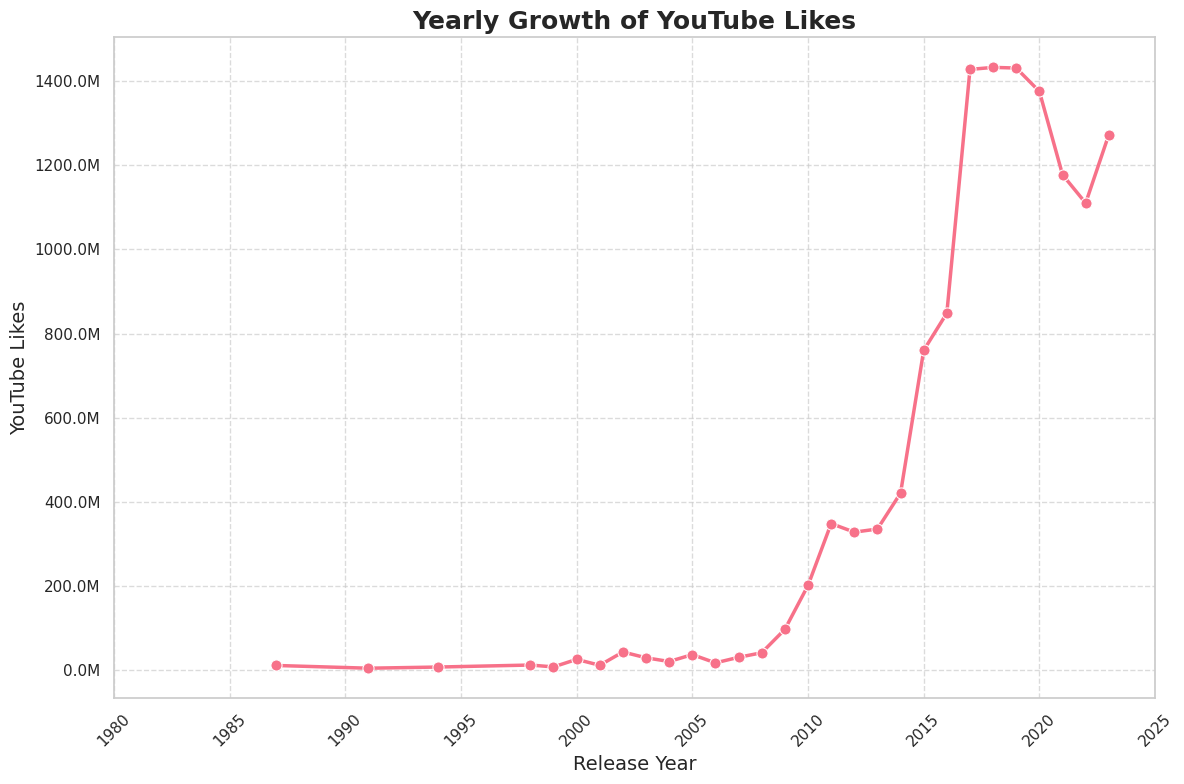

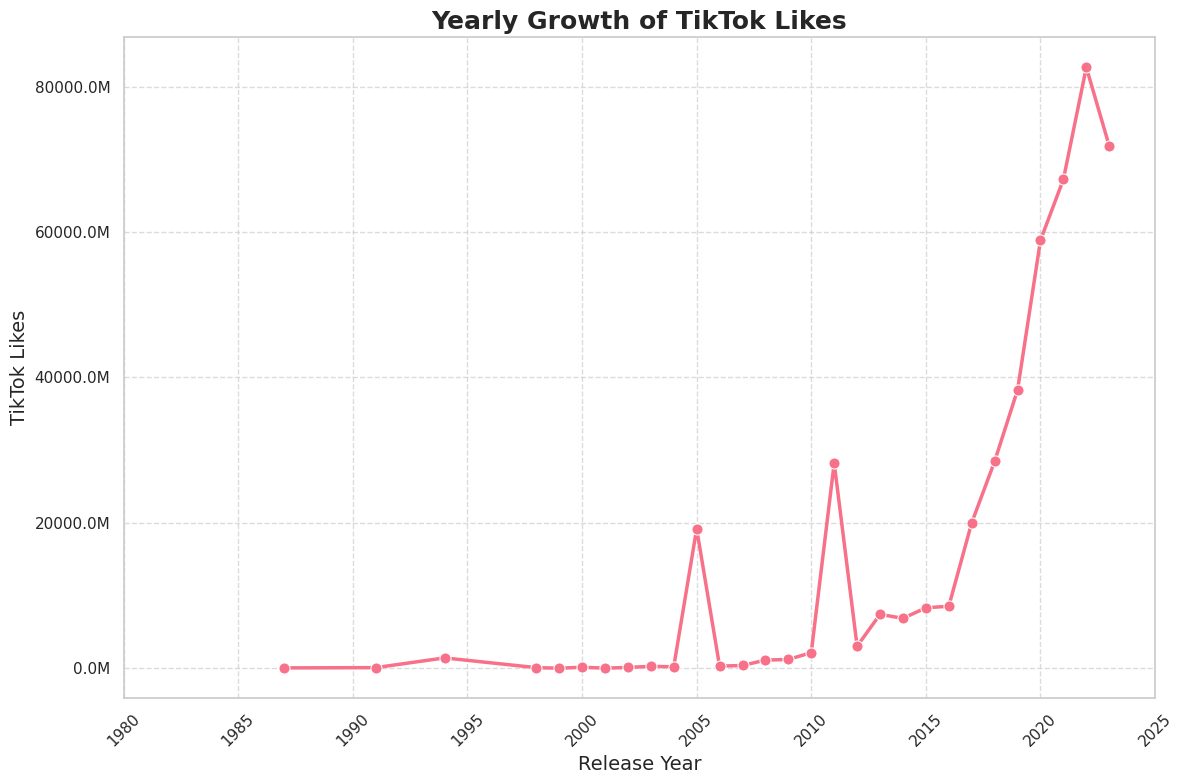

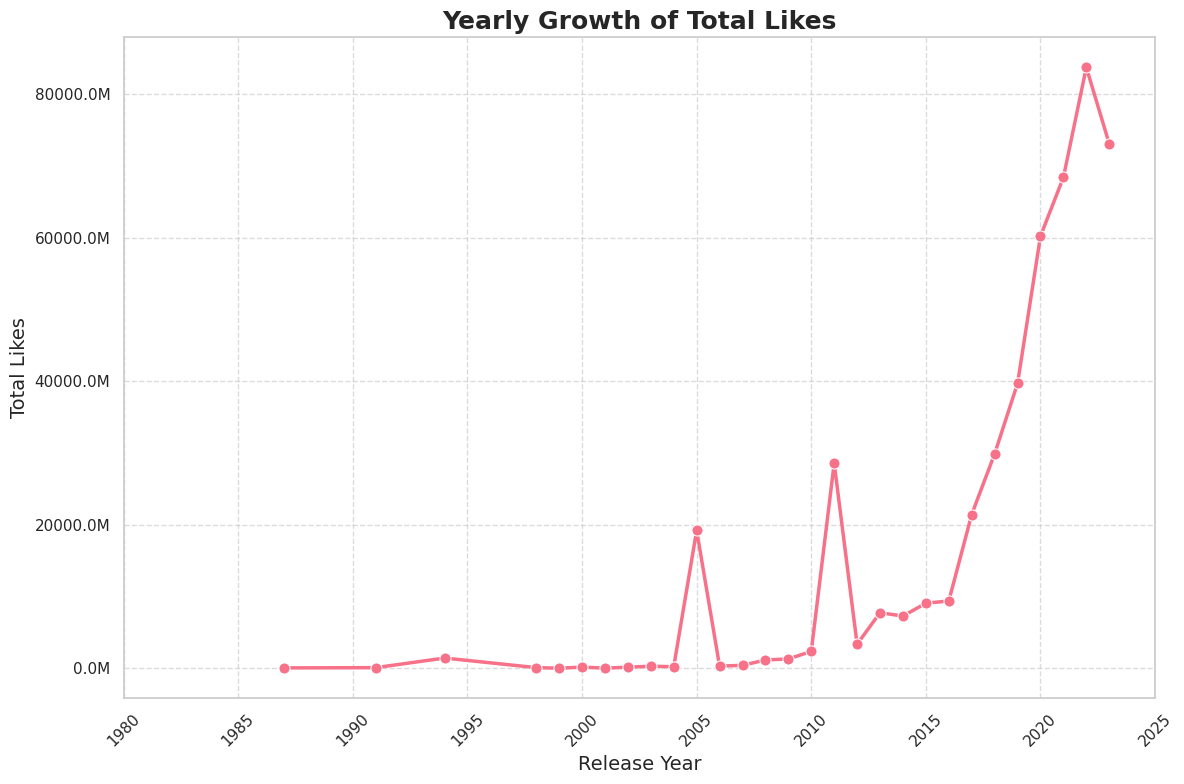

In [33]:

like_columns = ['YouTube Likes', 'TikTok Likes','Total Likes']

# Define a single color for all plots
plot_color = sns.color_palette("husl", n_colors=1)[0]

# Function to plot the yearly growth of a given metric
def plot_yearly_growth(column_name, title):
    counts_per_year = df[df['Release Year'] <= 2023].groupby('Release Year')[column_name].sum().reset_index()
    plt.figure(figsize=(12, 8))

    # Plot with the same color for all metrics
    sns.lineplot(x='Release Year', y=column_name, data=counts_per_year, marker='o', color=plot_color, linewidth=2.5, markersize=8)

    # Add title and labels
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel('Release Year', fontsize=14)
    plt.ylabel(column_name, fontsize=14)

    # Format the y-axis to display numbers in millions
    formatter = FuncFormatter(lambda x, pos: '%1.1fM' % (x * 1e-6))
    plt.gca().yaxis.set_major_formatter(formatter)

    # Add gridlines for readability
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.xlim(1980, 2025)

    # Improve x-ticks rotation and layout
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

for column in like_columns:
  plot_yearly_growth(column, f'Yearly Growth of {column}')

**Insights :**

YouTube Likes: The number of YouTube likes has shown a sharp increase since around 2013, peaking around 2016. After a slight decline, it shows a recent upward trend again.

TikTok Likes: TikTok likes have experienced a dramatic rise around 2005, 2011, particularly from around 2016 onwards, with a massive peak around 2020, followed by some fluctuations but maintaining a high level.

Total Likes: The total number of streams across platforms exhibits exponential growth, particularly post-2010, with significant peaks around 2020.

These plots emphasize the rapid growth and high engagement on platforms like YouTube and TikTok in recent years, reflecting increasing user interactions and content consumption on these digital platforms

# **Yearly Growth Different Playlist reach Wise till 2023**

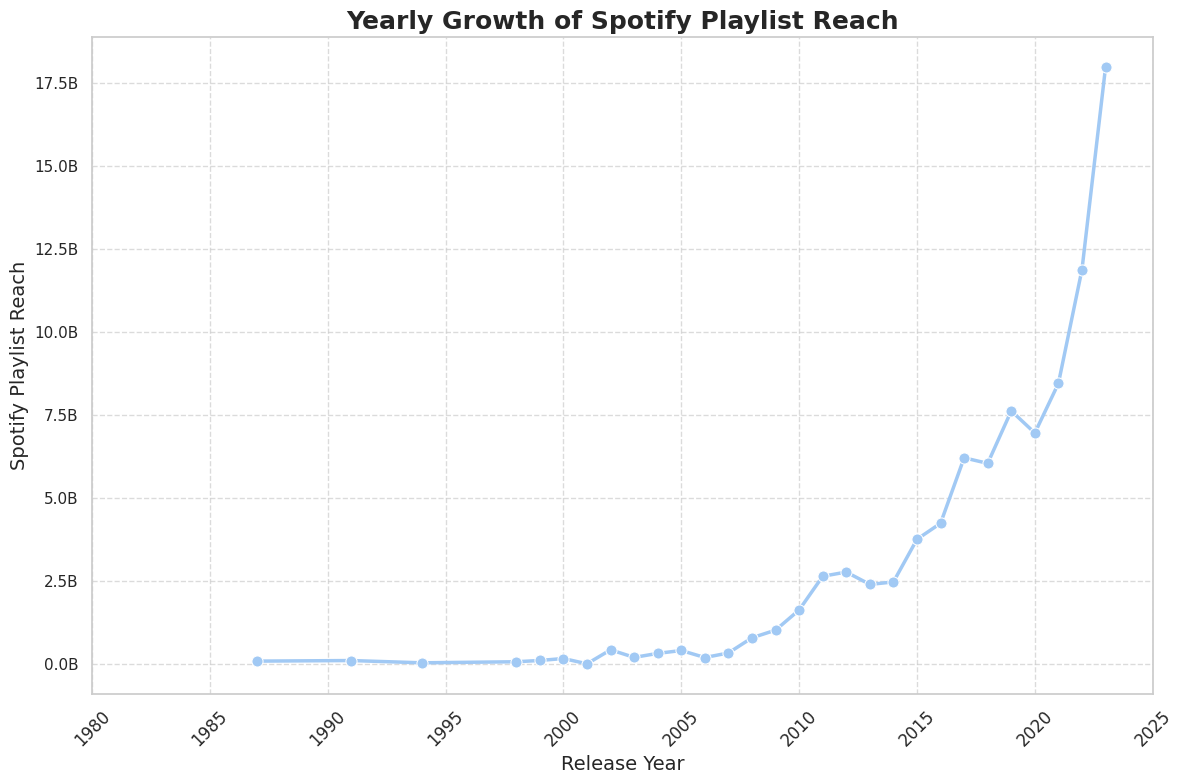

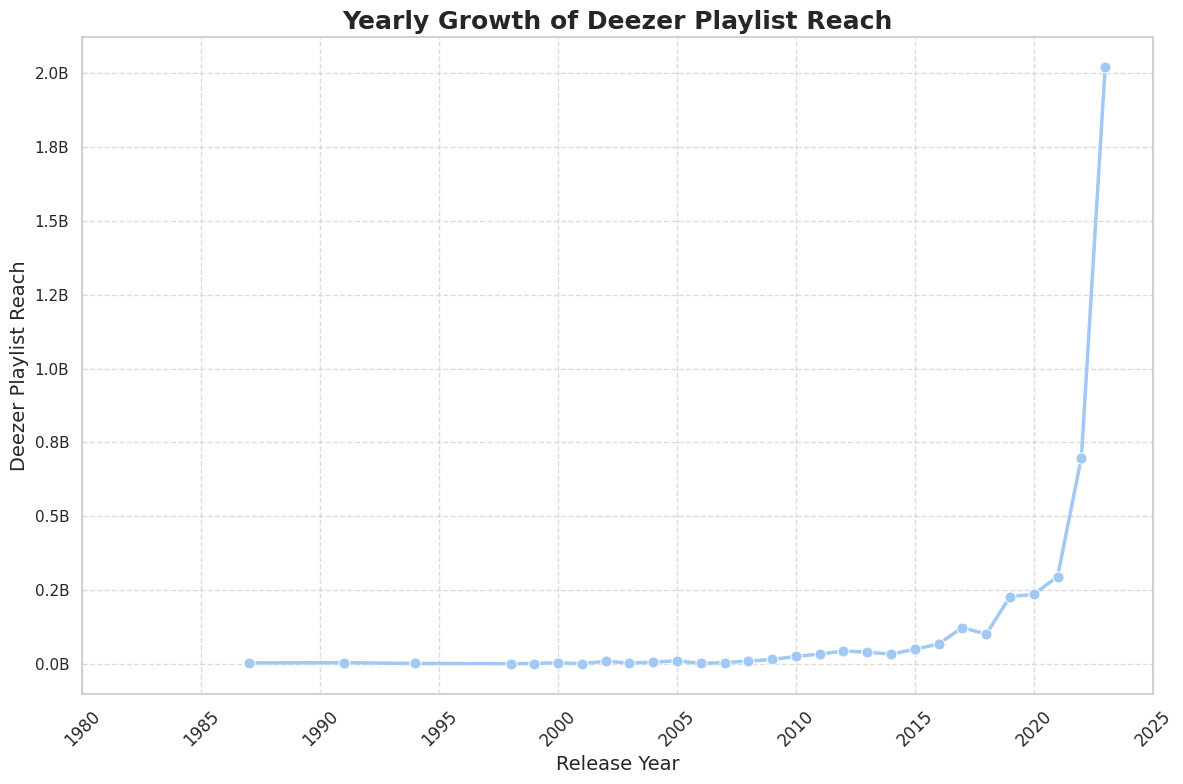

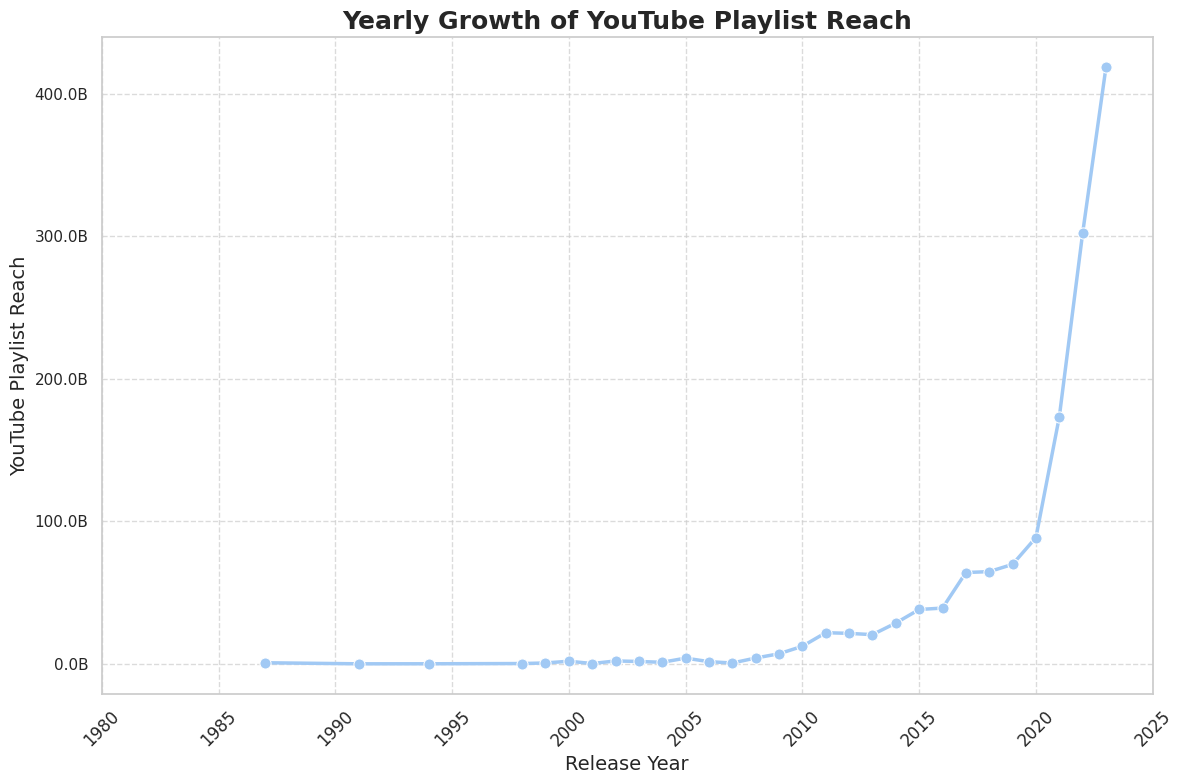

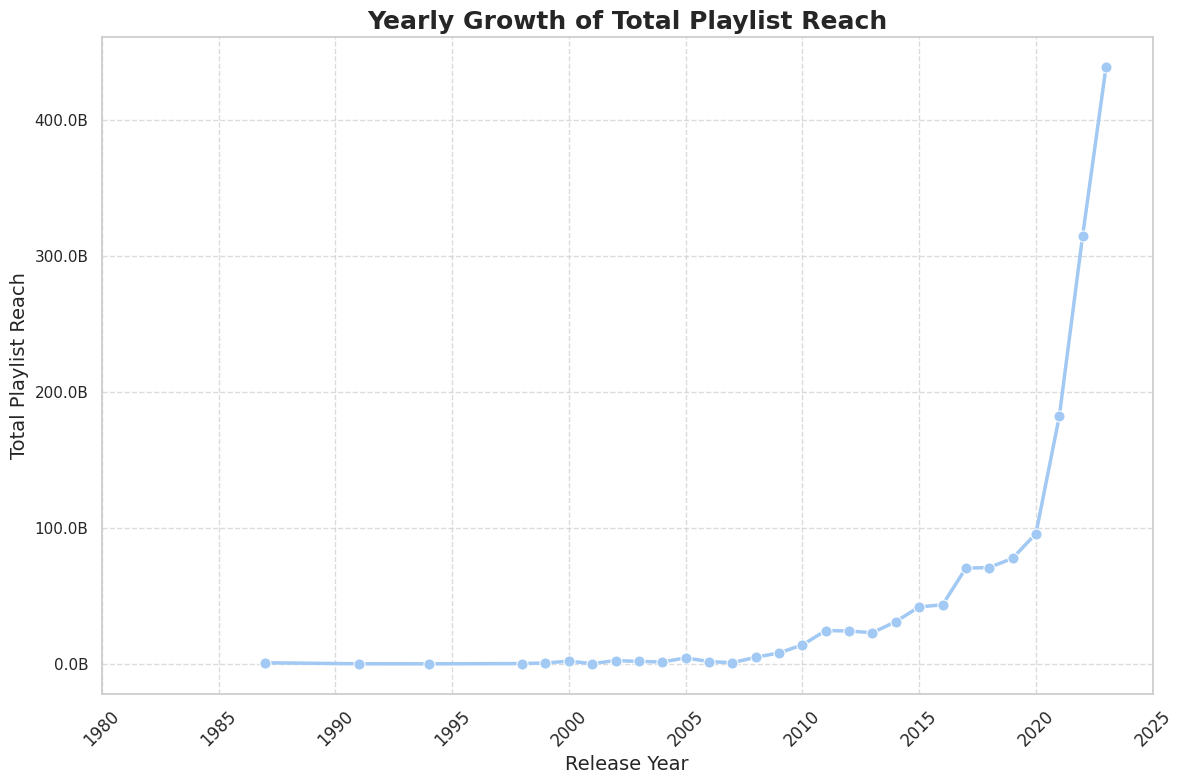

In [34]:
reach_column = ['Spotify Playlist Reach','Deezer Playlist Reach','YouTube Playlist Reach','Total Playlist Reach']

plot_color = sns.color_palette('pastel', n_colors=1)[0]

# Function to plot the yearly growth of a given reach type
def plot_yearly_growth(column_name, title):
    counts_per_year = df[df['Release Year'] <= 2023].groupby('Release Year')[column_name].sum().reset_index()

    plt.figure(figsize=(12, 8))

    # Plot with customized style
    sns.lineplot(x='Release Year', y=column_name, data=counts_per_year, marker='o', color=plot_color, linewidth=2.5, markersize=8)

    # Add title and labels with improved style
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel('Release Year', fontsize=14)
    plt.ylabel(column_name, fontsize=14)

    # Format the y-axis to display numbers in billions
    formatter = FuncFormatter(lambda x, pos: '%1.1fB' % (x * 1e-9))
    plt.gca().yaxis.set_major_formatter(formatter)

    # Add gridlines for readability
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.xlim(1980, 2025)

    # Improve x-ticks rotation and layout
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()
    plt.show()

# Plotting the yearly growth for different reach types
for column in reach_column:
    plot_yearly_growth(column, f'Yearly Growth of {column}')





**Insights :**

Spotify Playlist Reach: The reach of Spotify playlists has shown exponential growth, especially from around 2015 onwards, reaching a sharp peak in recent years.

Deezer Playlist Reach: Deezer's playlist reach has increased significantly, with a very steep rise starting around 2021.

YouTube Playlist Reach: YouTube playlists have seen a considerable increase in reach, particularly noticeable from 2016, with a sharp rise peaking around 2020.

Total Playlist Reach: The combined reach of playlists across platforms mirrors the individual trends, showing a dramatic and exponential increase in recent years, especially from 2020 onwards.

These trends highlight the substantial increase in the audience reach of playlists across various platforms, reflecting the growing importance and popularity of curated music collections.

# **Tracks by Stream Analysis**

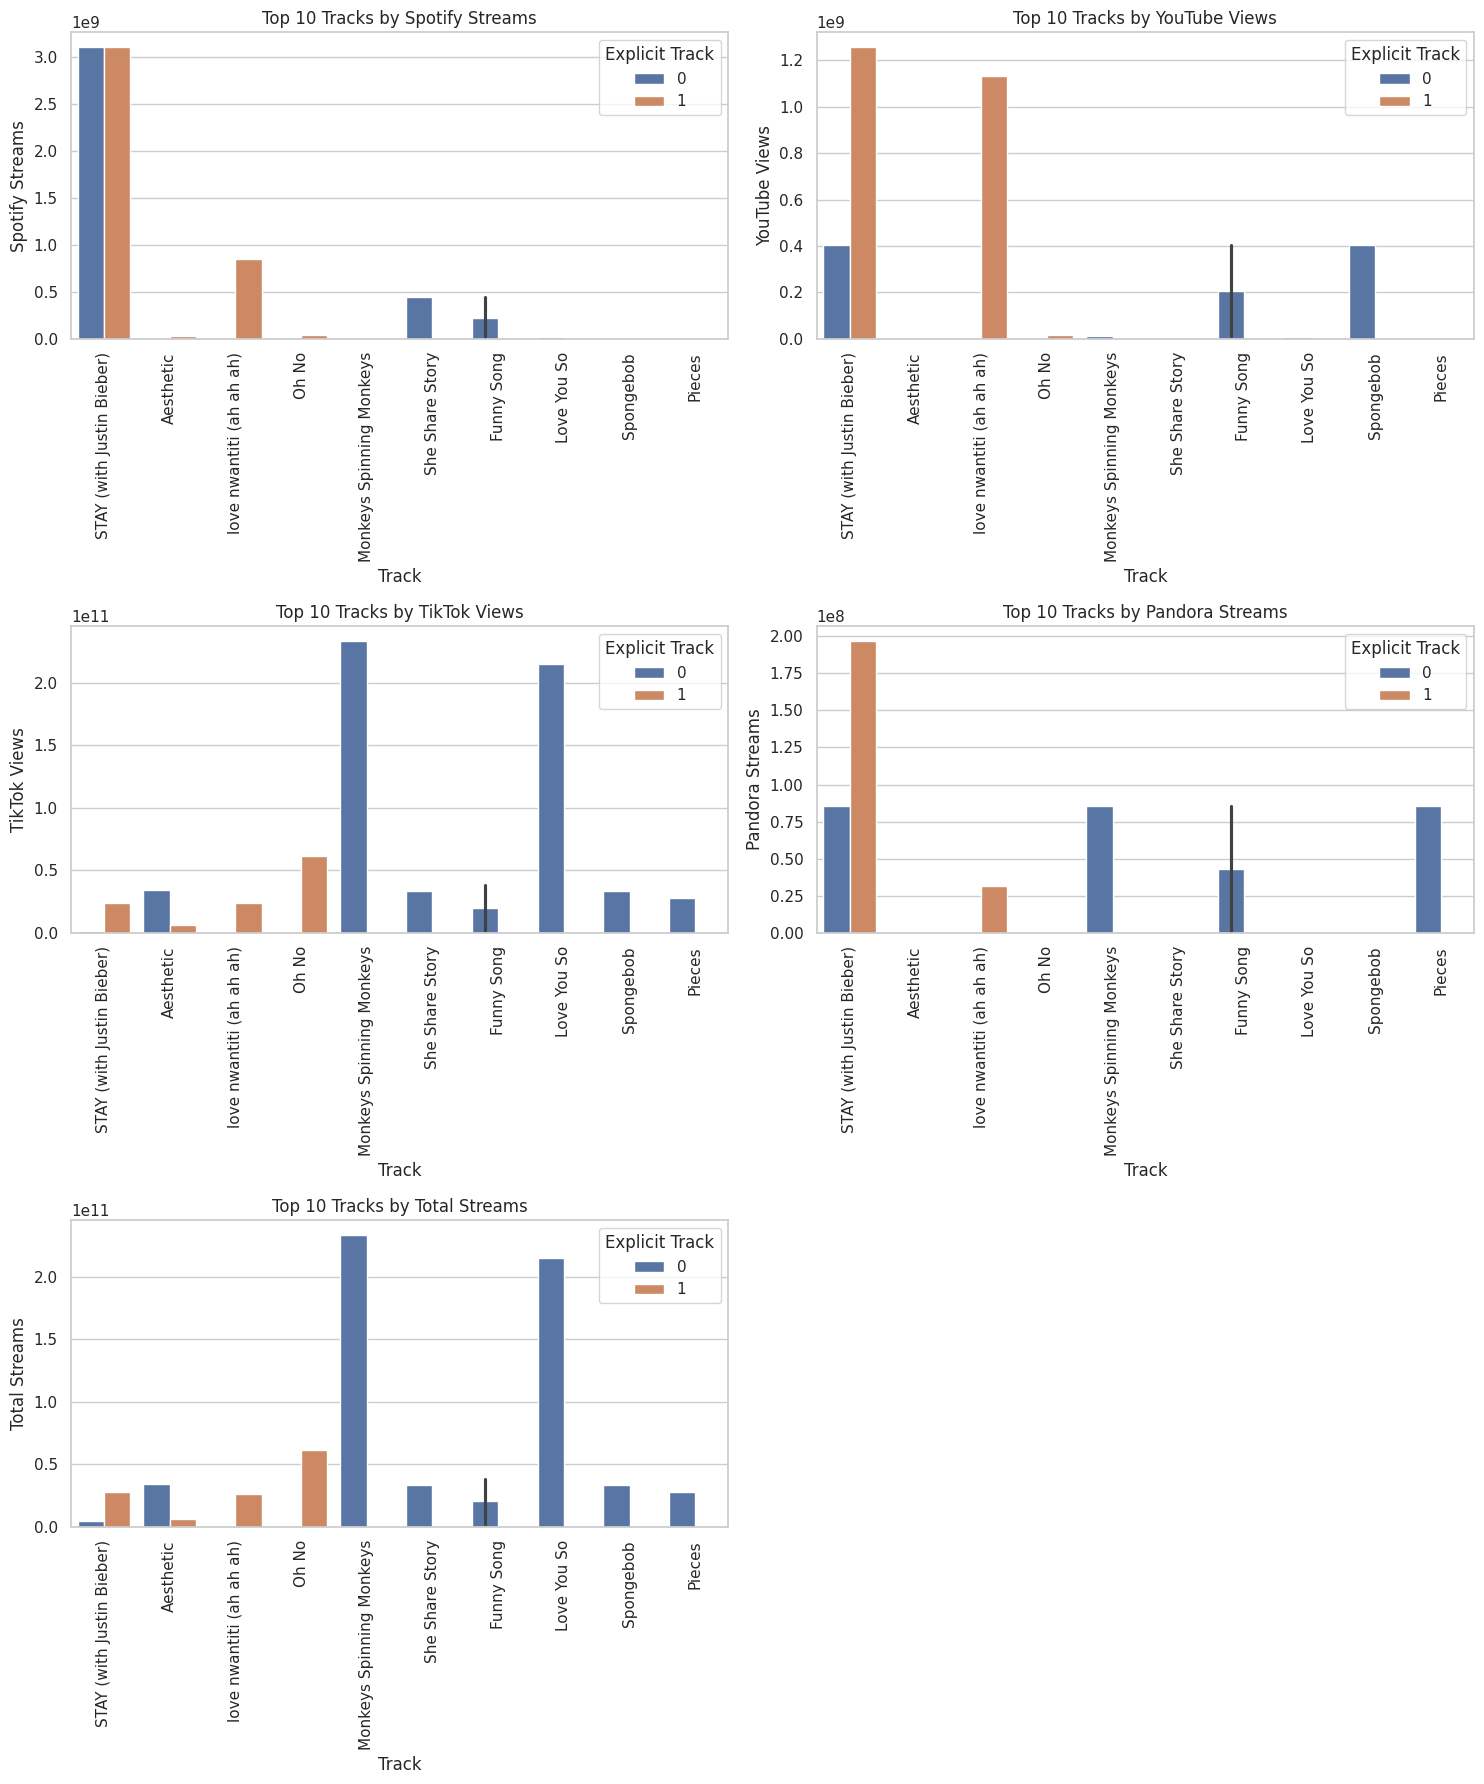

In [35]:
# Identify the top 10 tracks by Total Streams
top_10_tracks = df.nlargest(10, 'Total Streams')[['Track','Total Streams']]

# Merge to get the complete info of top 10 tracks
top_10_data = df[df['Track'].isin(top_10_tracks['Track'])]

fig, axes = plt.subplots(nrows= 3,ncols=2, figsize=(15,18))

axes = axes.flatten()

fields_to_plot = ['Spotify Streams','YouTube Views','TikTok Views','Pandora Streams','Total Streams','Spotify Popularity']

for i,field in enumerate(fields_to_plot):
  sns.barplot(data = top_10_data, x='Track', y=field, hue='Explicit Track', ax = axes[i])
  axes[i].set_title(f'Top 10 Tracks by {field}')
  axes[i].set_xlabel('Track')
  axes[i].set_ylabel(field)
  axes[i].tick_params(axis='x', rotation=90)  # Rotate track names for better readability

# Remove the unused subplot
fig.delaxes(axes[-1])

# Adjust the layout
plt.tight_layout()
plt.show()





**Insights :**

**Top 10 tracks by Spotify Streams -**

Dominant Track : STAY (with Justin Bieber) dominates Spotify streams with over 3 billion streams

Explicit content : A mix of explicit and non-explicit tracks, with explicit tracks like Aesthetic and love nwantiti (ah ah ah) having significant streams

**Top 10 tracks by Youtube Views -**

Top performers : STAY (with Justin Bieber) and Aesthetic lead Youtube views with over 1 billion views each

Explicit Content : Explicit tracks, marked in orange, have substantial views similat to Spotify

**Top 10 tracks by Tiktok Views -**

Viral Hits : Monekys Spinning Monkeys and Love You So have the highest TikTok Views, each over 2 billion

Explicit Content : A mix of explicit and non-explicit tracks, with explicit tracks having notable views.

**Top 10 tracks by Pandora Streams -**

Leading Track : STAY (with Justin Bieber) is also the most streamed track on pandora followed by Monkeys spinning Monkeys and Pieces

Explicit Content : Less represntation of explicit tracks compared to Spotify and Youtube, with fewer explicit tracks in the top 10

**Top 10 Tracks by Total Streams -**

Overall Leaders : Monkeys Spinng Monkeys and Love You So dominate total streams across platforms

Explicit Content : Explicit tracks like Oh No and Aesthetic have significant total streams, indicating their wide popularity

# **Tracks by Likes Analysis**

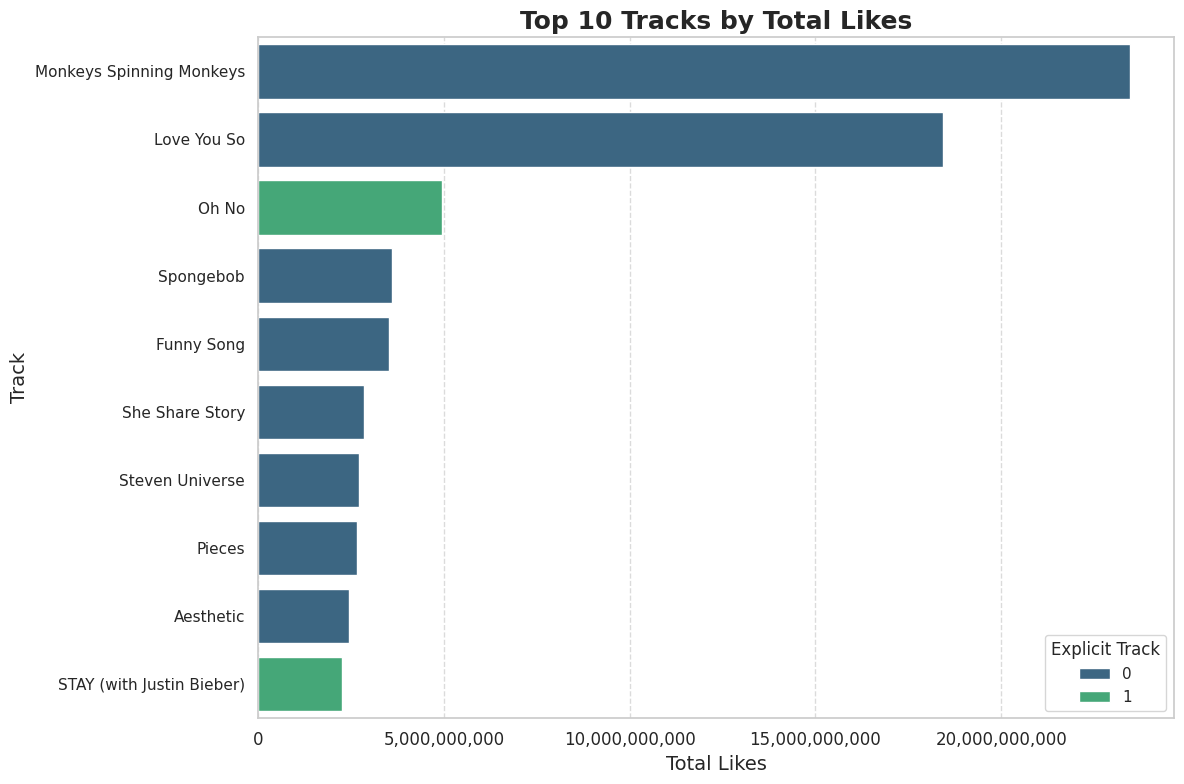

In [36]:
# group by track and sum the total likes for each track
top_tracks_likes = df.groupby(['Track', 'Explicit Track'])['Total Likes'].sum().nlargest(10).reset_index()

# Define the color palette
palette = sns.color_palette("viridis", n_colors=len(top_tracks_likes['Explicit Track'].unique()))

# Create a bar plot for the top 10 tracks by total likes
plt.figure(figsize=(12,8))

sns.barplot(data = top_tracks_likes, x='Total Likes',y='Track', hue='Explicit Track',palette=palette)

# Add title and labels with improved style
plt.title('Top 10 Tracks by Total Likes', fontsize=18, fontweight='bold')
plt.xlabel('Total Likes', fontsize=14)
plt.ylabel('Track', fontsize=14)

# Format x-axis to display numbers with thousands separators
formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)

# Add gridlines for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Rotate x-tick labels if necessary
plt.xticks(rotation=0, fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()

**Insights :**

Leading Tracks : Monkeys Spinning Monkeys and Love You So have the highest total likes, each exceeding 20 billion likes

Explicit Content : Oh No and STAY (with Justin Bieber) are the only explicit tracks in the top 10 with Oh No having significant likes

Diverse Content : The list includes a variety of content from viral tracks like Monkeys Spinning Monkeys to popular tracks like STAY (with Justin Bieber)

# **Album by Stream Analysis**

<ipython-input-37-09d89239a580>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Album Name', y=metric, data=top_4, palette='bright')


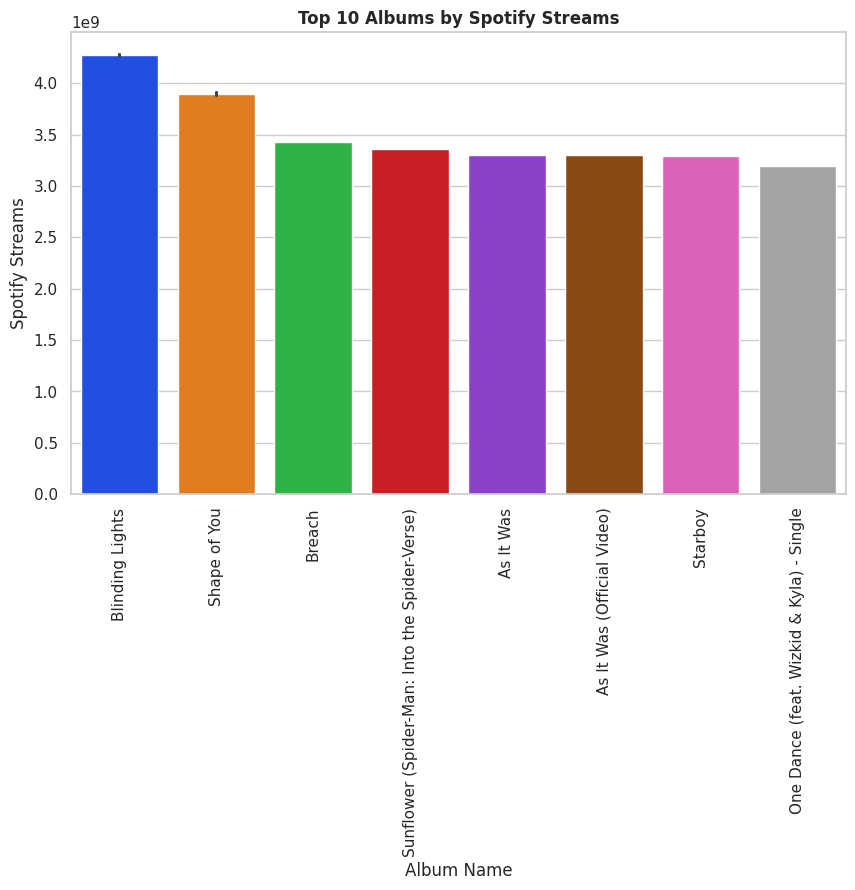

<ipython-input-37-09d89239a580>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Album Name', y=metric, data=top_4, palette='bright')


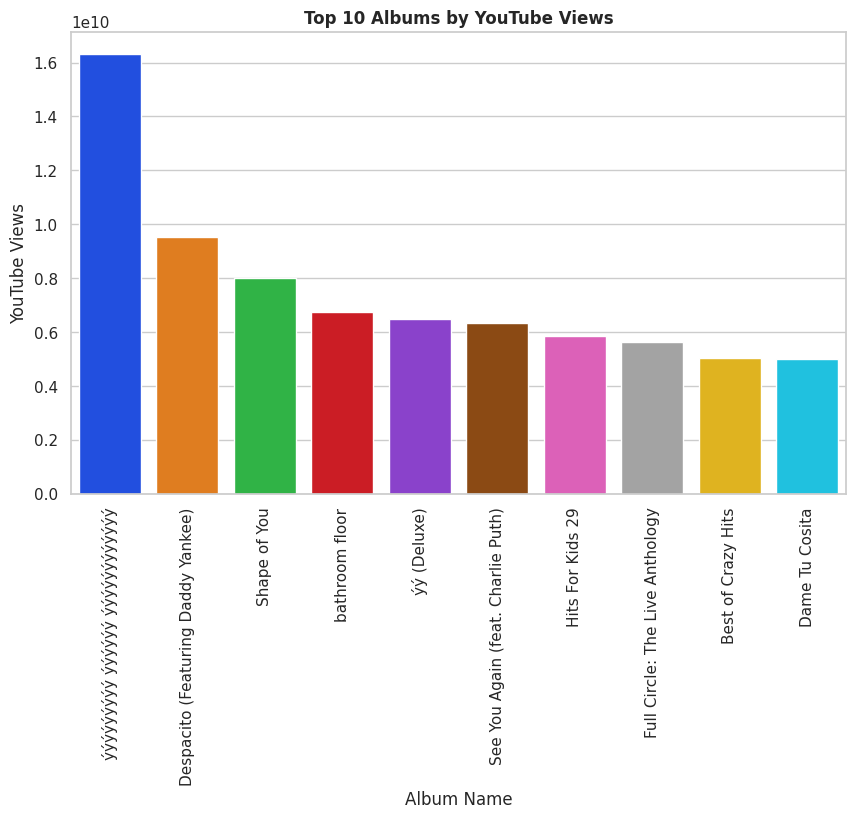

<ipython-input-37-09d89239a580>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Album Name', y=metric, data=top_4, palette='bright')


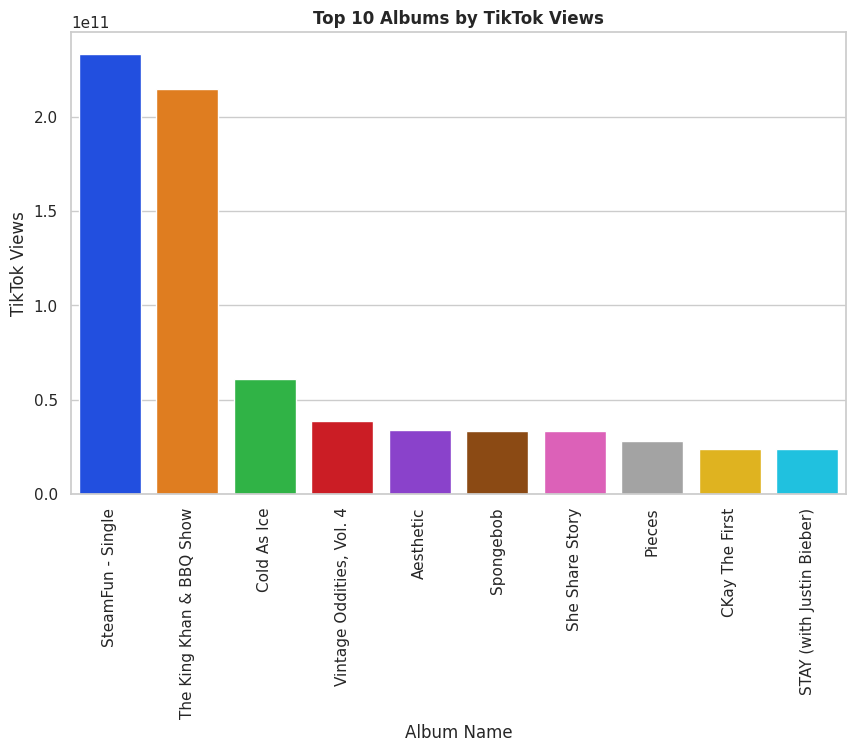

<ipython-input-37-09d89239a580>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Album Name', y=metric, data=top_4, palette='bright')


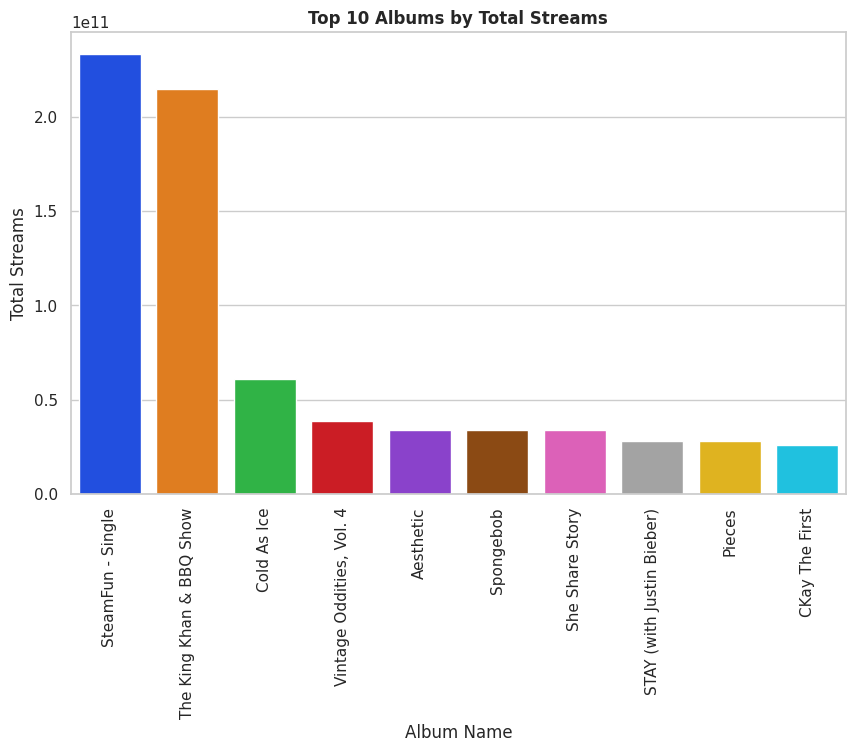

In [37]:
# seaborn plot function for top 4 albums

def seaborn_plot_top_4(metric):
  top_4 = df.nlargest(10, metric)
  plt.figure(figsize=(10,6))
  sns.barplot(x='Album Name', y=metric, data=top_4, palette='bright')
  plt.xlabel('Album Name')
  plt.ylabel(metric)
  plt.title(f'Top 10 Albums by {metric}', fontweight='bold')
  plt.xticks(rotation=90)
  plt.show()

# Using Seaborn for enhanced visualization
seaborn_plot_top_4('Spotify Streams')
seaborn_plot_top_4('YouTube Views')
seaborn_plot_top_4('TikTok Views')
seaborn_plot_top_4('Total Streams')


**Insights :**

**Top 10 Albums by Spotify Streams-**

Leading Album : Blinding Lights has the highest number of Spotify streams over 4 billion.

Populat Tracks : Albums like Shape of You, Breach also have significant streams each 3 billion.

**Top 10 Albums by Youtube Views-**

Top performer : Despacito (Featuring Daddy Yankee) dominates Youtube views with over 1.6 billion views

Variety in Content : Albums such as Shape of You and Bathroom floor also rank high, each with substantial views.

**Top 10 Albums by Tiktok Views-**

Viral Albums : SteamFun - Single and The King Khan & BBQ Show lead Tiktok views, each exceeding over 2 billion views

Diverse content : Other albums like Cold As Ice and Vintage Oddities, Vol. 4 also have notable views

**Top 10 Albums by Total Streams-**

Overall Leaders : StreamRun - Single and The King Khan & BBQ Show dominate total streams across platforms.

Wide Range : Albums like Cold As Ice and Vintage Oddities, Vol. 4 rank high , showig a broad appeal across different platforms

# **Album by Spotify Popularity Analysis**

<ipython-input-38-3aa5c28638f9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Spotify Popularity', y='Album Name', data = top_10_albums,palette='deep')


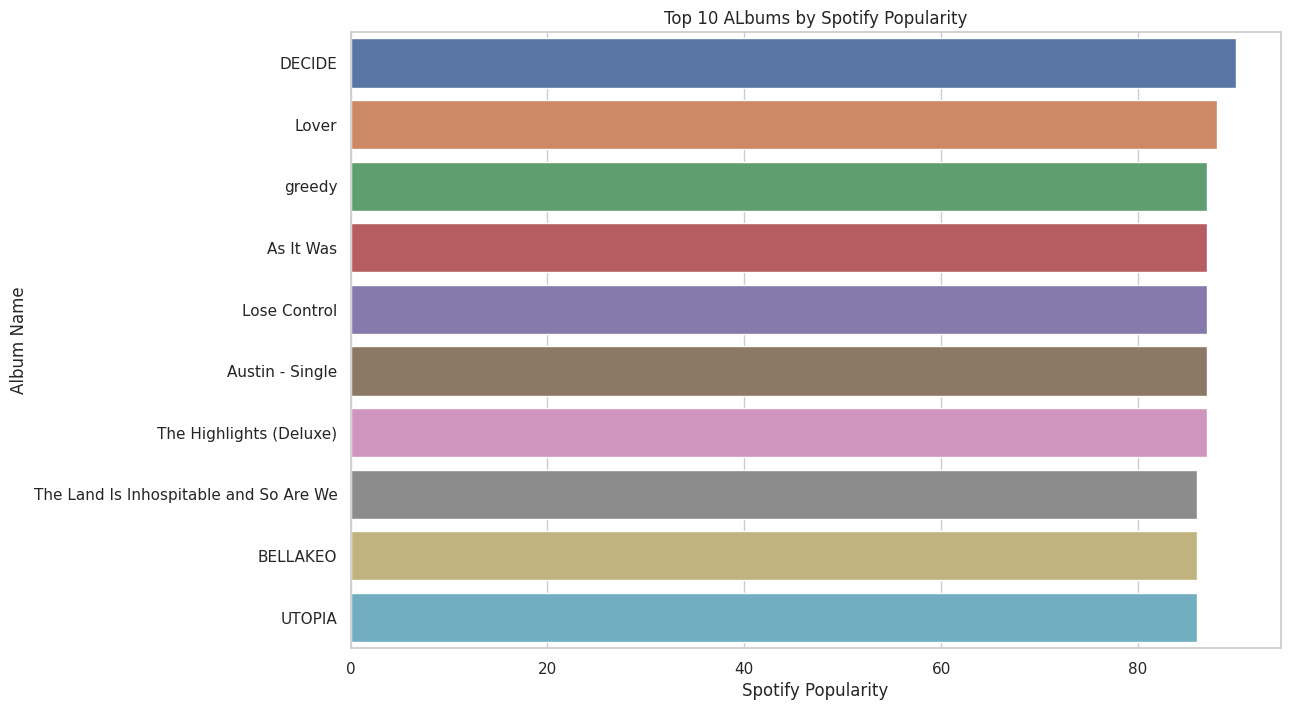

In [38]:
top_10_albums = df.nlargest(10, 'Spotify Popularity')

plt.figure(figsize=(12,8))
sns.barplot(x='Spotify Popularity', y='Album Name', data = top_10_albums,palette='deep')

plt.title("Top 10 ALbums by Spotify Popularity")
plt.xlabel("Spotify Popularity")
plt.ylabel("Album Name")

plt.show()

**Insights :**

High popularity Rating : The top 10 albums are al highly popular on Spotify, with minimal variation in their popularity scores, indicating consistence audience engagement

Diverse Content : The variey in album names suggest a broad range of genres and styles appealing to different listener preferences

No Single Dominant Album : Unlike other metrics where a single album dominate, popularity ratings are evenly distributed among the top albums

# **Most Streamed Songs Analysis**

<ipython-input-39-4473db61fecb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Streams', y='Track', data = top_10_streamed_songs, palette ='bright')


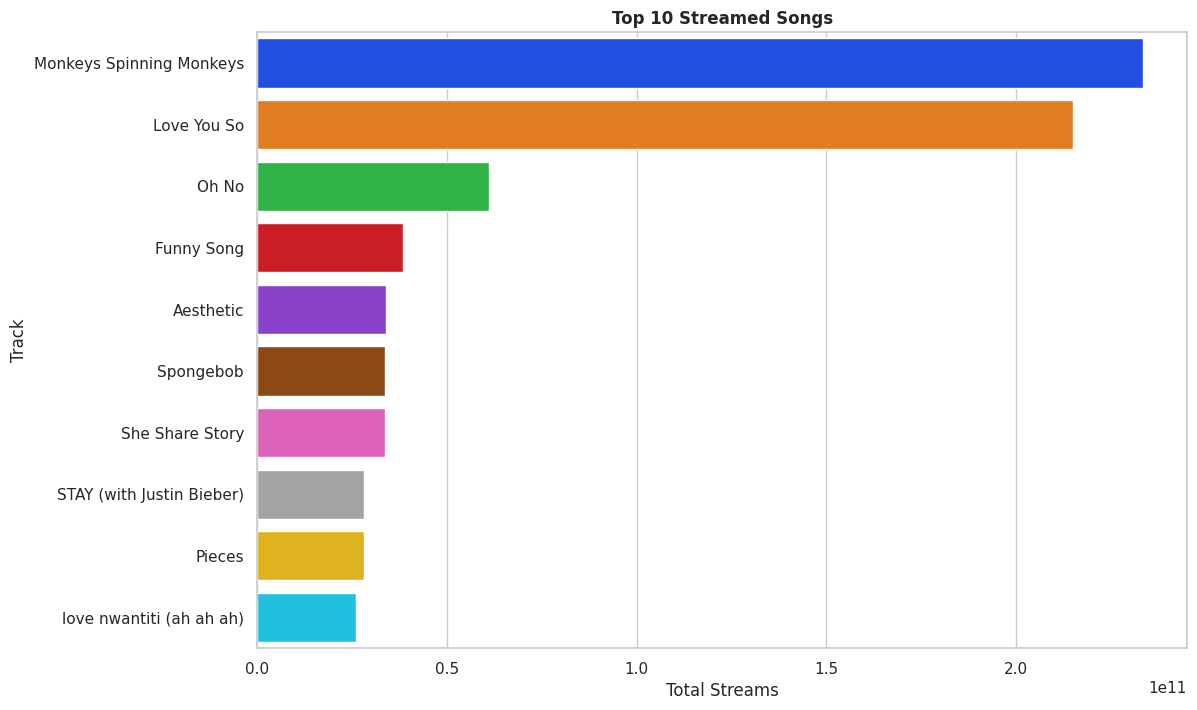

In [39]:
top_10_streamed_songs = df.nlargest(10,'Total Streams')

plt.figure(figsize=(12,8))
sns.barplot(x='Total Streams', y='Track', data = top_10_streamed_songs, palette ='bright')

plt.title("Top 10 Streamed Songs", fontweight = 'bold')
plt.xlabel("Total Streams")
plt.ylabel("Track")

plt.show()

**Insights :**

Viral Dominance : Viral tracks like Monkeys Spinning Monkeys and Love You So dominate the top streamed songs, indicating their widespread appeal and engagement

Variety in Genres: The diversity of tracks, ranging from humorous songs to popular hits, reflects varied audience preferences.

Significant Streams: Even the lower-ranked tracks in the top 10 have substantial streams, each exceeding 500 million.

# **Percentage Analysis of Spotify Playlist**

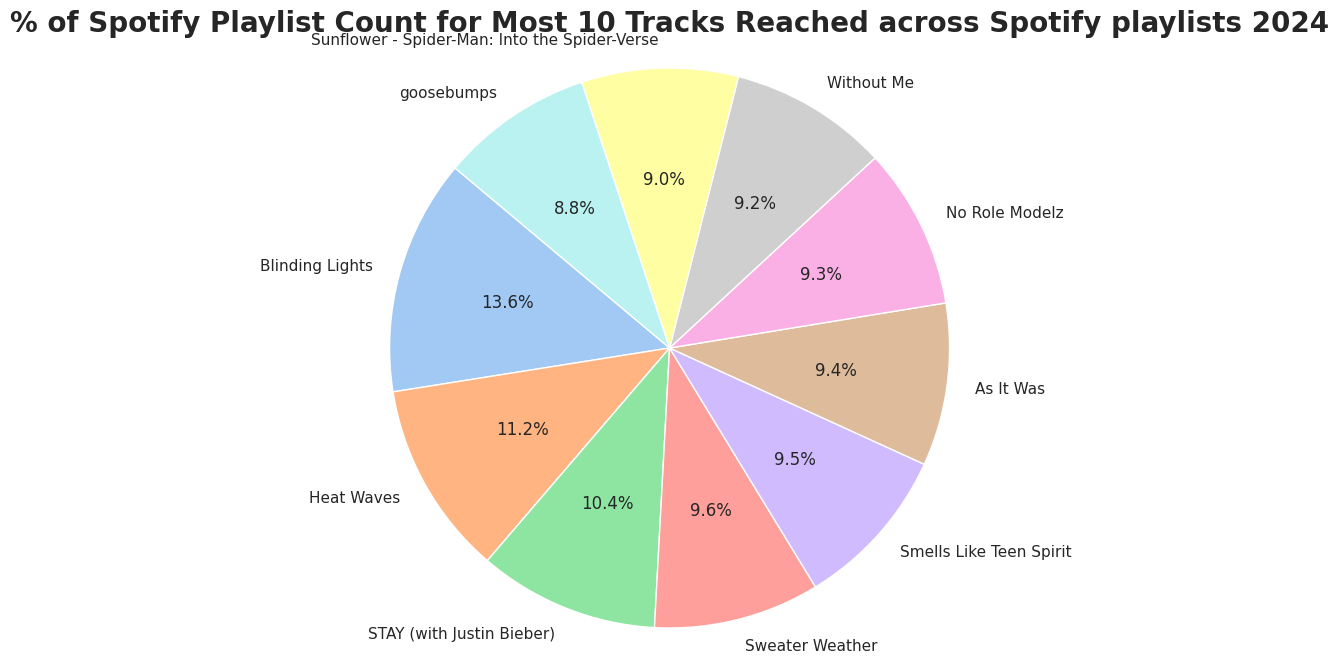

In [40]:
top_10_tracks = df.nlargest(10,'Spotify Playlist Count')

plt.figure(figsize=(12,8))
plt.pie(top_10_tracks['Spotify Playlist Count'], labels =top_10_tracks['Track'],autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

plt.title("% of Spotify Playlist Count for Most 10 Tracks Reached across Spotify playlists 2024", fontweight = 'bold', fontsize=20)

plt.axis('equal')
plt.show()

**Insights :**

**Dominance of Blindng Lights :** This trac leads the playlist count %, indicating its widespread popularity.

**Broad range of Genres :** The top tracks cover a wide range of genres, appealing to diverse listener preferences.

**High Representation :** All the top tracks have a significant presence in Spotify playlists, each appearing in at least 8.8% of playlist.

# **Last 10 years Track Trend**

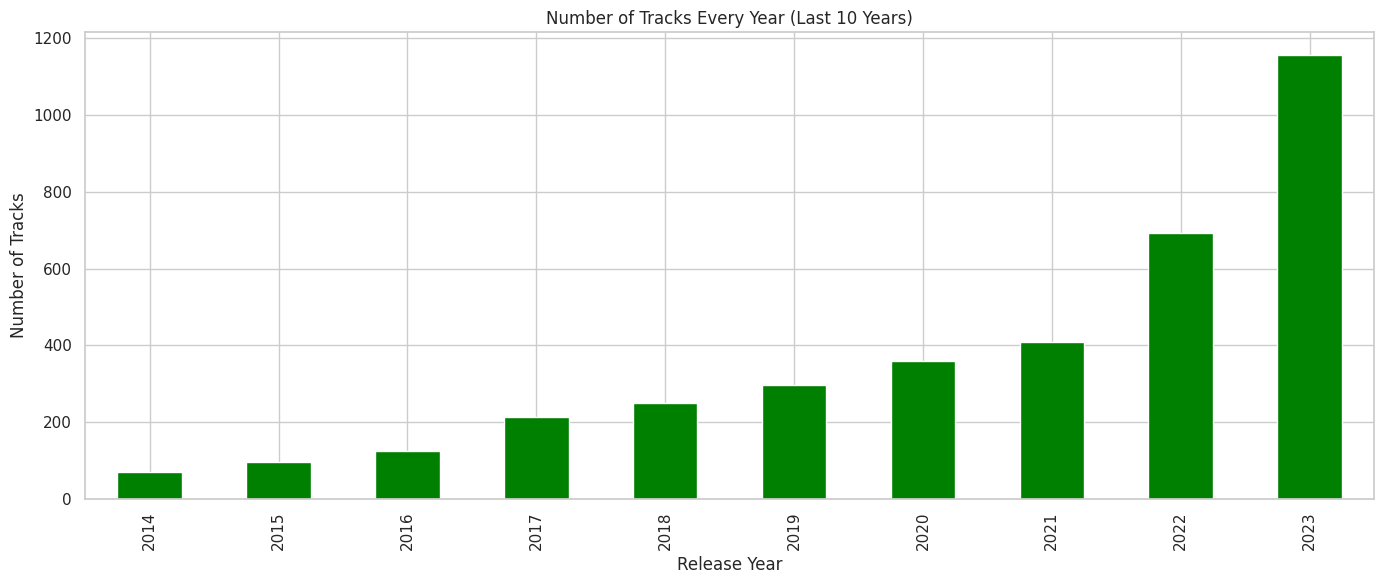

In [41]:
# Get the most recent year in the dataset
current_year = df['Release Year'].max()

# Filter the dataset for the last 10 release years
last_10_years_data = df[df['Release Year'] >= (current_year - 9)]

tracks_per_year = last_10_years_data.groupby('Release Year')['Track'].count()

plt.figure(figsize=(14, 6))
tracks_per_year.plot(kind='bar', color='green')
plt.title('Number of Tracks Every Year (Last 10 Years)')
plt.xlabel('Release Year')
plt.ylabel('Number of Tracks')
plt.tight_layout()
plt.show()


**Insights :**

Steady Growth : The number of tracks released has shown steady growth over the past decade, indicating increasing musical production and releases.

2023 Peak : The significant spike in 2023 suggests a peak in musical activity, which could be attributed to various factors such as increased artist productivity or changes in the music industry

# **Most Listened Song of 2023 on Spotify**





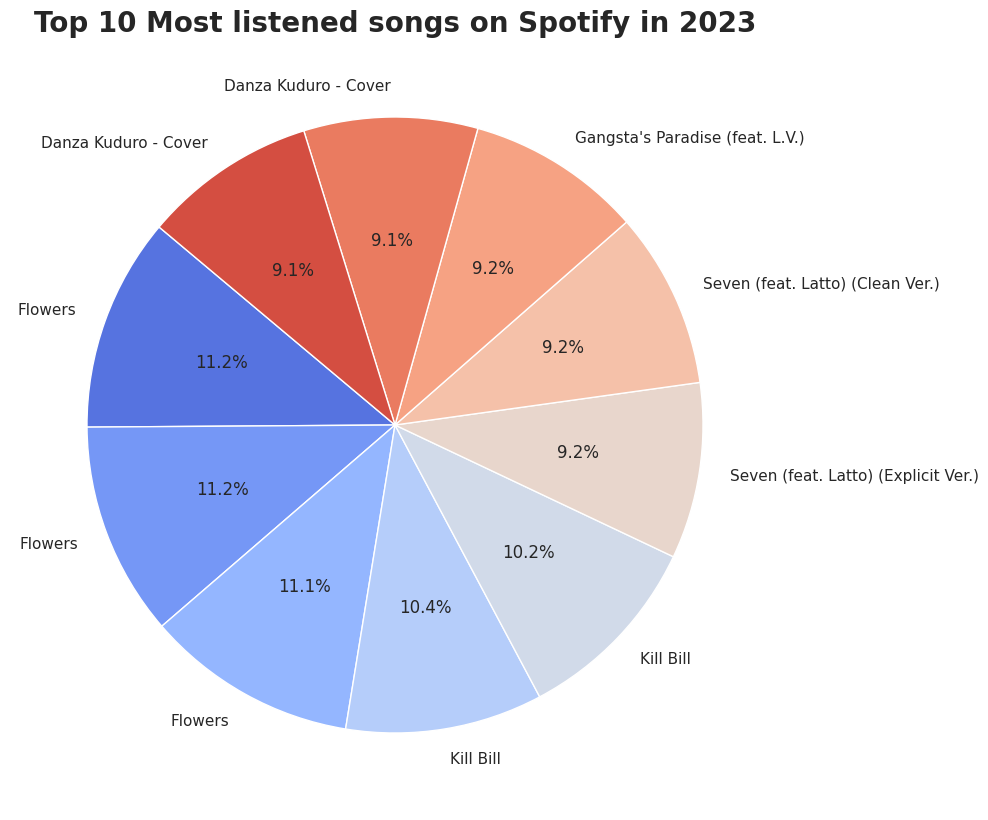

In [42]:
df_2023 = df[df['Release Year'] == 2023]

top_10_spotify_streams_2023 = df_2023.nlargest(10,'Spotify Streams')

plt.figure(figsize=(10,10))
plt.pie(top_10_spotify_streams_2023['Spotify Streams'], labels=top_10_spotify_streams_2023['Track'],
        autopct='%1.1f%%', colors=sns.color_palette('coolwarm', n_colors=10), startangle=140)

plt.title("Top 10 Most listened songs on Spotify in 2023", fontweight='bold', fontsize=20)

plt.show()

**Insights :**

Dominance of Flowers : Multiple versions of this song lead the chart with the highest percentage of listens, indicating its enduring popularity

Popularity of Seven (feat. Latto) (Explicit Ver.) and Danza Kuduro - Cover : Multiple versions of these two collectively make up a large portion of the top 10, highlighting the songs board appeal.



# **Album released in 2023 by total streams**

<ipython-input-43-650aa1f372e0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Album Name', y='Total Streams', data =top_10_albums_2023,palette='muted')


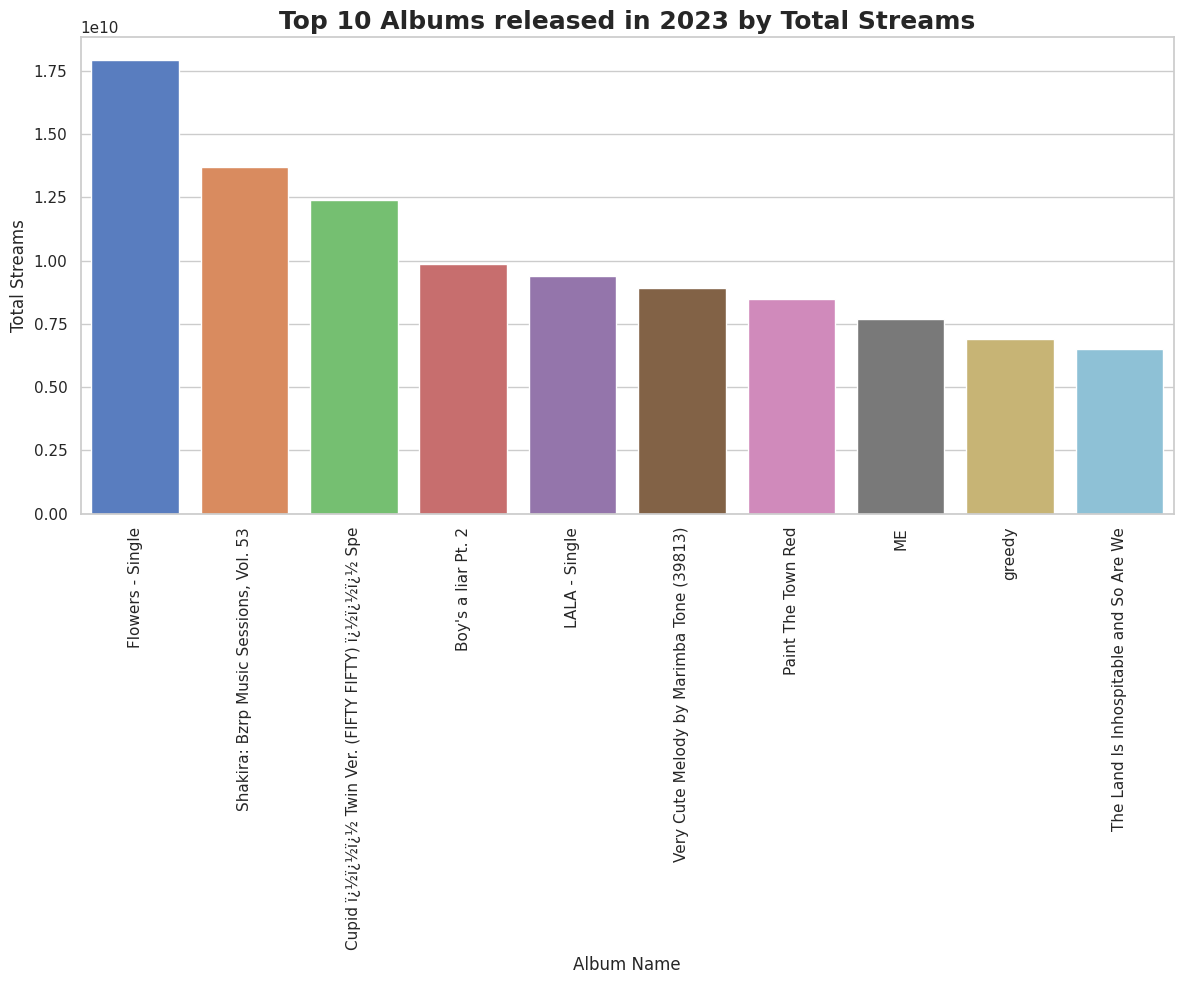

In [43]:
albums_2023 = df[df['Release Year'] == 2023]

top_10_albums_2023 = albums_2023.nlargest(10, 'Total Streams')

plt.figure(figsize=(12,10))
sns.barplot(x='Album Name', y='Total Streams', data =top_10_albums_2023,palette='muted')

plt.title("Top 10 Albums released in 2023 by Total Streams", fontsize=18, fontweight='bold')
plt.xlabel("Album Name")
plt.ylabel("Total Streams")

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Insights :**

Domiance of Flowers-Single : This album stands out significantly with the highest number of streams, indicating strong listener engagement and popularity

Diverse Album Titles :This variety in album name suggests a wide range of genres and themes that appealed to listeners in 2023

# **Artists by Total Streams in 2023**

<ipython-input-44-9f7c02aff598>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Artist', y='Total Streams', data = top_10_artists_2023,palette='pastel')


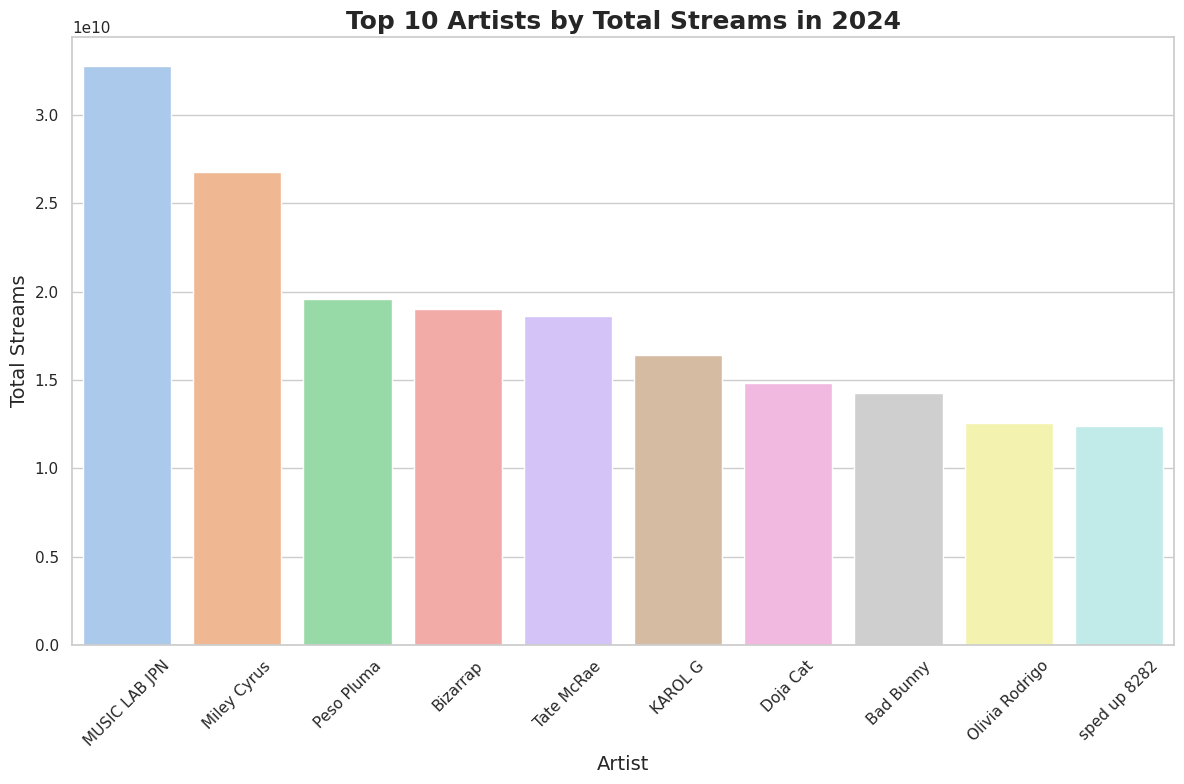

In [44]:
tracks_2023 = df[df['Release Year'] == 2023]

top_artists_2023 = tracks_2023.groupby('Artist')['Total Streams'].sum().reset_index()

top_10_artists_2023 = top_artists_2023.nlargest(10, 'Total Streams')

plt.figure(figsize=(12,8))
sns.barplot(x= 'Artist', y='Total Streams', data = top_10_artists_2023,palette='pastel')

plt.title("Top 10 Artists by Total Streams in 2024", fontsize=18, fontweight='bold')
plt.xlabel("Artist", fontsize=14)
plt.ylabel("Total Streams", fontsize=14)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Insights :**

Dominance of MUSIC LAB JPN : This band leads significantly, showing a resurgence or continued strong fan base.

Diverse Range of Artists : This list includes a variety of genres and styles, from Miley Cyrus to Doja Cat.

Strong Streaming numbers : All artists in the top 10 have over 1 billion streams, indicating a high level of engagement across different fan bases.

# **Album Released Each Month in 2023**

   Release Date  Release Month  Release Year
3    2023-01-12              1          2023
5    2023-11-10             11          2023
14   2022-10-07             10          2022
15   2023-03-22              3          2023
17   2023-09-14              9          2023


<ipython-input-45-d62d79d3349e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Release Month', y='Album Count', data=albums_per_month_2023, palette='deep')


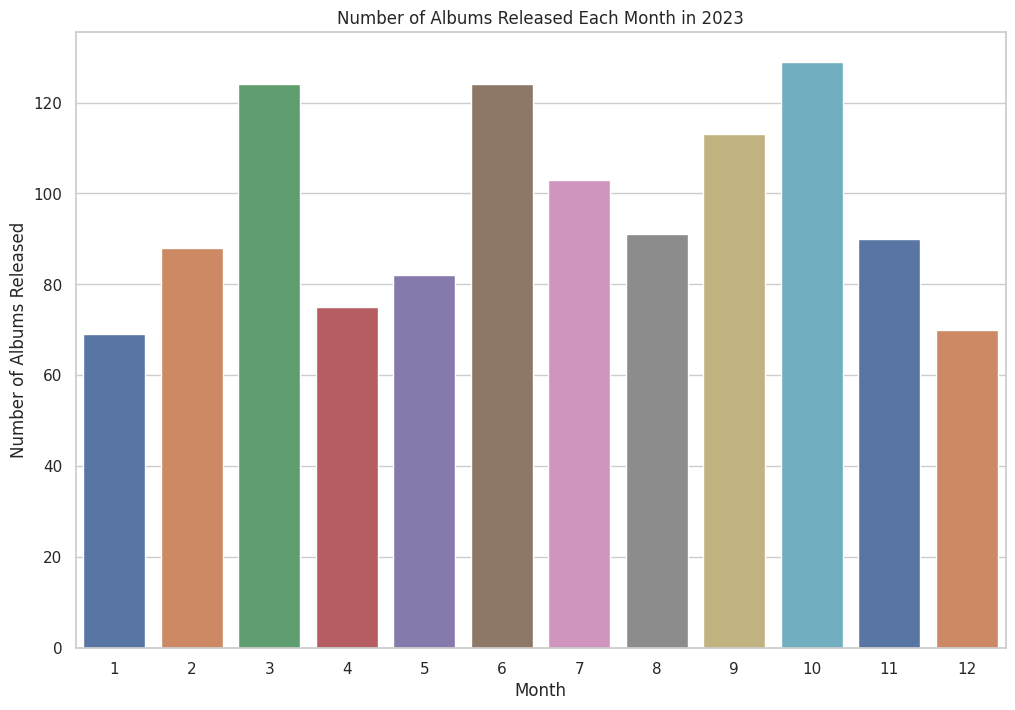

In [45]:
# Extract the month and year from the release date
df['Release Month'] = df['Release Date'].dt.month
df['Release Year'] = df['Release Date'].dt.year

# Display the updated DataFrame with the new columns (optional)
print(df[['Release Date', 'Release Month', 'Release Year']].head())

# Filter the data for albums released in 2023
albums_2023 = df[df['Release Year'] == 2023]

# Count the number of albums released each month in 2023
albums_per_month_2023 = albums_2023['Release Month'].value_counts().reset_index()
albums_per_month_2023.columns = ['Release Month', 'Album Count']
albums_per_month_2023 = albums_per_month_2023.sort_values('Release Month')

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Release Month', y='Album Count', data=albums_per_month_2023, palette='deep')

# Add titles and labels
plt.title('Number of Albums Released Each Month in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Albums Released')

# Show the plot
plt.show()


**Insights :**

Peak Release period : The peak period for album releases is in March, June and October indicating a possible strategic time for artists and labels to release new music

There is also noticeable decline in album releases in April, May and Dec which could be due to various factors such as strategies or seasonal preferences

# **Multivariate Analysis**

### **Pairplot Analysis**

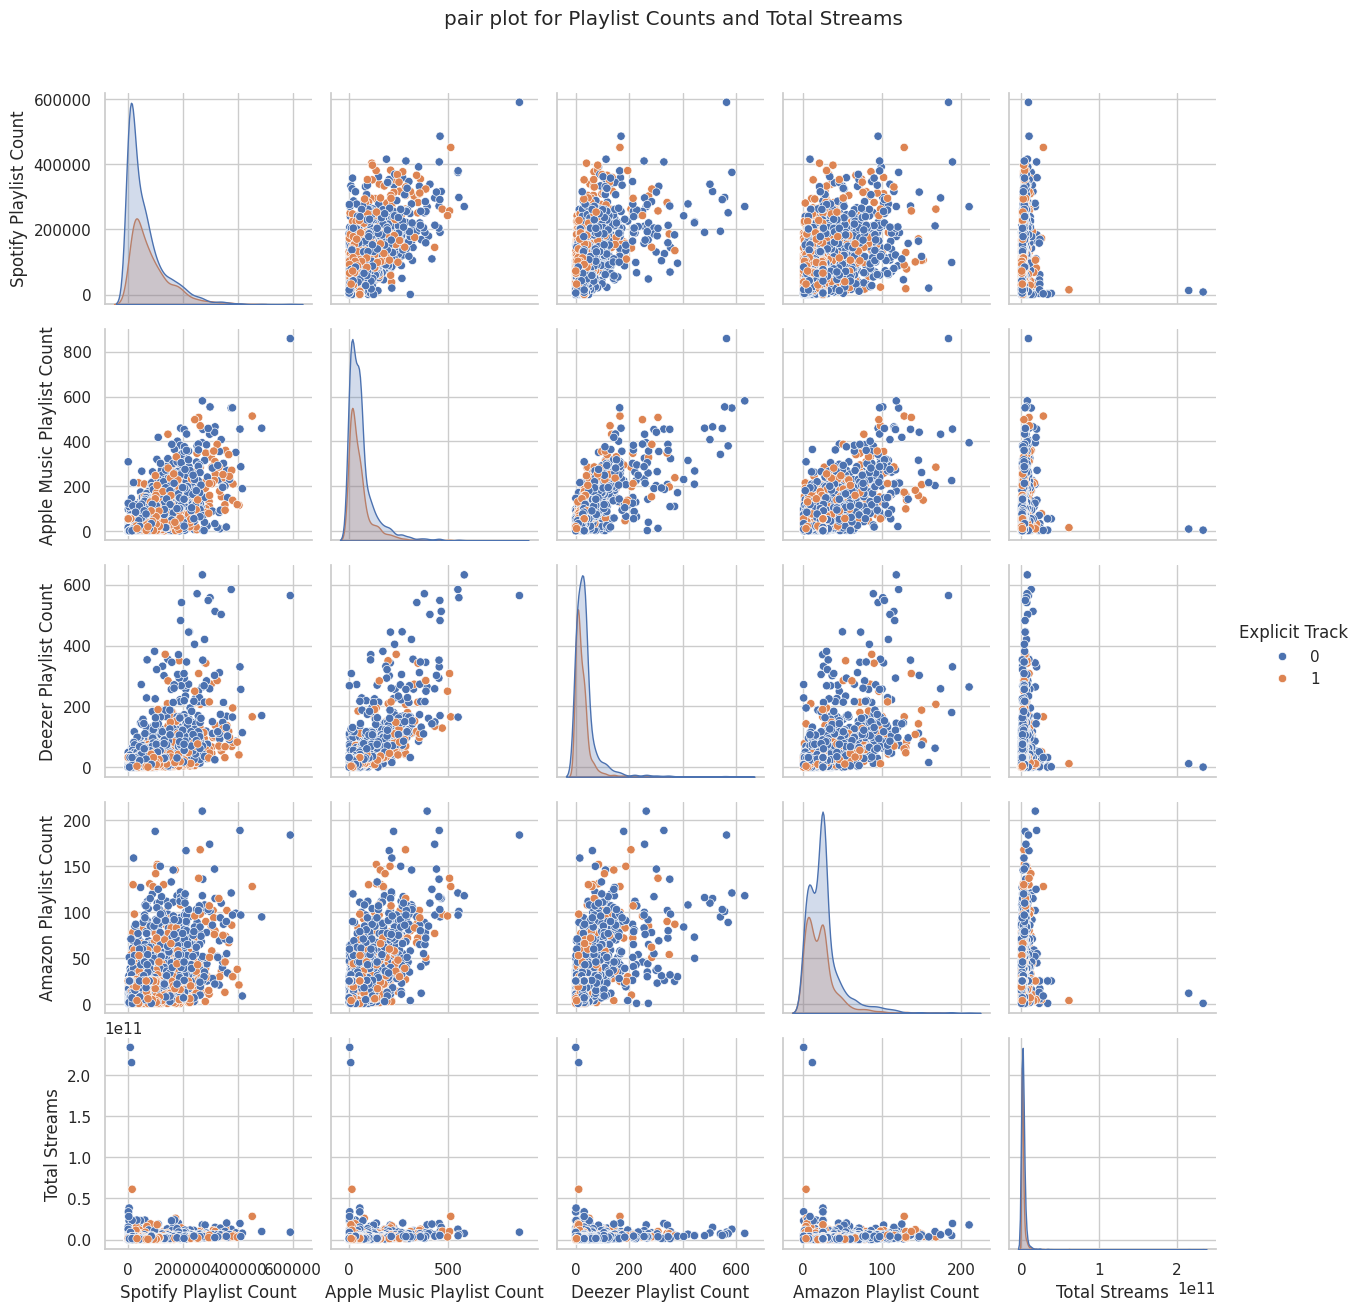

In [46]:
# Select relevant columns for the pair plot including hue
selected_columns = ['Spotify Playlist Count', 'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count', 'Total Streams', 'Explicit Track']
pairplot_data = df[selected_columns]

sns.pairplot(pairplot_data, hue='Explicit Track')

plt.suptitle("pair plot for Playlist Counts and Total Streams", y=1.05)

plt.show()

**Insighst :**

Non-explicit Tracks Dominance: Non-explicit tracks tend to have higher playlist counts and total streams across all platforms.

Platform Correlations: There are positive correlations between playlist counts on different platforms, indicating that popular tracks tend to be popular across multiple services.

Explicit Tracks: Explicit tracks generally have lower playlist counts and total streams.

# **Conclusion :**

Non-explicit tracks dominate top positions in streams and likes.

Artists like Bad Bunny, Doja Cat, Drake, and Kreepa are popular with explicit tracks.

Diverse representation of genres and content types across top artists.

Drake has the highest total playlist count, with Bad Bunny, The Weeknd, and Travis Scott also highly popular.

Peak album release period is in March, June and October with significant releases in July and September.

Noticeable decline in album releases in April, May and Dec.

Positive correlations between playlist counts on different platforms.

Non-explicit tracks have higher playlist counts and total streams across all platforms.

Explicit tracks generally have lower playlist counts and total streams.

# **Hypothesis Testing**

### **Hypothesis:**

**Null Hypothesis (H₀) :** There is no significant difference in the average Spotify Streams between Songs release in the first half of the year (control_group) and songs released in the second half (test_group)

**Alternate Hypothesis (H₁) :** There is a significant difference in the average Spotify Streams between Songs release in the first half of the year (control_group) and songs released in the second half (test_group)

In [56]:
# Define the control group : songs released in the first half of the year (Jan-Jun):
control_group = df[df['Release Month'].between(1,6)]['Spotify Streams']

# Define the test group : songs released in the second half of the year (July-Dec):
test_group = df[df['Release Month'].between(7,12)]['Spotify Streams']

In [60]:
# Calculate the mean and standard deviation of the control group and round to 2 decimal places
control_mean = control_group.mean()
control_std = control_group.std()

# Calculate the mean and standard deviation of the test group and round to 2 decimal places
test_mean = test_group.mean()
test_std = test_group.std()

# Output the calculated mean and standard deviation of each group
print("Control Group (Jan-Jun) - Mean:", control_mean, ", Std Dev:", control_std)
print("Test Group (Jul-Dec) - Mean:", test_mean, ", Std Dev:", test_std)

Control Group (Jan-Jun) - Mean: 560534705.6378765 , Std Dev: 570269521.0466218
Test Group (Jul-Dec) - Mean: 452888356.3428969 , Std Dev: 521648437.9322406


In [61]:
# Calculate the sample size of each group

n_control = len(control_group)
n_test = len(test_group)

# Calculate the variance of each group divided by its samples size
a = (control_std **2)/n_control
b = (test_std**2) / n_test

# Calculate the Z-score using the difference in means and the combined standard error
Z_score = (control_mean - test_mean) / np.sqrt(a + b)

# Output the calculated Z-score
print(f"Manual Z-score: {Z_score}")


Manual Z-score: 6.152092360111887


In [62]:
# Set the significance level
alpha = 0.05

# Calculate the critical Z value for a two-tailed test at the specified significance level
critical_z_value = st.norm.ppf(1 - alpha / 2)

# Output the calculated critical Z value
print(f"Critical Z value: {critical_z_value}")

Critical Z value: 1.959963984540054


In [63]:
if Z_score > critical_z_value:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")




Reject the null hypothesis: There is a significant difference between the groups.


In [64]:

p_value = 1 - st.norm.cdf(Z_score)
print(f"Manual Z-test P-value: {p_value}")

Manual Z-test P-value: 3.823366068189671e-10


In [65]:
# Perform the Z-test using statsmodels
z_statistic, p_value = sm.stats.ztest(control_group, test_group, alternative='two-sided')
print(f"Statsmodels Z-statistic: {z_statistic}, P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")



Statsmodels Z-statistic: 6.156435787264263, P-value: 7.440032054089243e-10
Reject the null hypothesis: There is a significant difference between the groups.


# ***Conclusions :***

The **manual Z-Score (6.152)** and **statsmodels Z-Statistic (6.156)** are both **greater** than the **critical Z value (1.960)**.


*   This means the observed difference in group means is statistically significant.
*   Therefore, we reject the null hypothesis H0

Both manual(3.823366068189671e-10) and statsmodels (7.440032054089243e-10) p-values are much smaller than the significance level (0.05).


*   This confirms the result that the observed difference is statistically significant
*   Again, we reject the null hypothesis H0


This means that there is enough evidence to conclude that there is a significant difference in the average Spotify Streams between songs released in the first half of the year (Group A) and songs released in the second half (Group B).

This conclusion is supported by both the manual calculations and the statsmodels results, which align closely and indicate that there is strong statistical difference between the two groups of songs released in the first and second halves of the year.


